In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from shapely.validation import make_valid
# if using windows make sure you have kaleido installed, more specifically have this version installed in order to write an image 
# pip install kaleido==0.1.0post1 

In [3]:
month = "January"
year = "2026"
sqmi = True
CONVERSION_FACTOR = 3.8610215854245e-7 #sq meters to sqmi
#CONVERSION_FACTOR = 1e-6 # sq meters to sqkm

folder_name = f"{month}{year}"


In [4]:

Palestinian_Land_Mass = gpd.read_file(f'ArcGISOnline\palestinian_land_mass.geojson')
Israeli_Land_Mass = gpd.read_file(f'ArcGISOnline\israeli_land_mass.geojson')
Seam_Zone = gpd.read_file(f'ArcGISOnline\palestinian_seam_zone_land_mass.geojson')
East_Jerusalem = gpd.read_file('BoundariesFiles\EastJerusalemBoundary.geojson')
Oslo_Agreement = gpd.read_file('BoundariesFiles\OsloAgreementJurisdictionBorders.geojson')
Governorates = gpd.read_file('BoundariesFiles/GovernoratesBoundaries.geojson')
Admin_IP = gpd.read_file('BoundariesFiles\IsraeliAdminBoundaries.geojson')


C:\Users\karim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyogrio\raw.py:198: RuntimeWarning: Several features with id = 1386 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


In [5]:
Palestinian_Land_Mass = Palestinian_Land_Mass.rename(columns= {'Area_Sqmi': 'Area_sqmi'})
Palestinian_Land_Mass.head()

,id,display,governorate,class,geometry
0,9787,Palestinian Controlled Land in Area A,Hebron Governorate,A,"MULTIPOLYGON (((35.21257 31.46988, 35.21241 31..."
1,10149,Palestinian Developed Land in Area C,Hebron Governorate,C,"MULTIPOLYGON (((35.05429 31.66007, 35.05464 31..."
2,10750,Palestinian Developed Land in Area C,Hebron Governorate,C,"MULTIPOLYGON (((35.13693 31.63877, 35.13703 31..."
3,4110,Palestinian Developed Land in Area C,Jericho Governorate,C,"MULTIPOLYGON (((35.45668 31.89013, 35.45668 31..."
4,10753,Palestinian Developed Land in Area C,Hebron Governorate,C,"MULTIPOLYGON (((35.14246 31.64729, 35.14224 31..."


In [6]:
Seam_Zone.head()

,id,display,governorate,class,geometry
0,478,Palestinian Developed Land in Seam Zone (Area C),Tulkarm Governorate,C,"MULTIPOLYGON (((35.06603 32.44076, 35.06574 32..."
1,479,Palestinian Developed Land in Seam Zone (Area C),Tulkarm Governorate,C,"MULTIPOLYGON (((35.06011 32.4233, 35.05908 32...."
2,480,Palestinian Developed Land in Seam Zone (Area C),Tulkarm Governorate,C,"MULTIPOLYGON (((35.06696 32.44652, 35.06696 32..."
3,485,Palestinian Developed Land in Seam Zone (Area C),Tulkarm Governorate,C,"MULTIPOLYGON (((35.06047 32.43177, 35.06054 32..."
4,486,Palestinian Developed Land in Seam Zone (Area C),Tulkarm Governorate,C,"MULTIPOLYGON (((35.06752 32.44614, 35.0676 32...."


In [7]:
East_Jerusalem = East_Jerusalem.rename(columns= {'AreaSqmi': 'Area_sqmi'})
East_Jerusalem.head()

,FID_Green_,FID_Israel,fid_1,name,Shape_Leng,Shape_Area,geometry
0,1,4,6.0,Jerusalem District,72325.462934,7.182702e+07,"MULTIPOLYGON (((171016.115 143347.959, 171281...."


In [8]:
Oslo_Agreement

,fid,OBJECTID,CLASS,Area_sqmi,Display,geometry
0,1,2,B,0.233596,Area B,"MULTIPOLYGON (((35.18188 31.81809, 35.18188 31..."
1,2,3,Nature Reserve,64.320607,Nature Reserve,"MULTIPOLYGON (((35.26058 31.66194, 35.26179 31..."
2,3,8,H1,8.174100,Area H1,"MULTIPOLYGON (((35.09078 31.56492, 35.0928 31...."
3,4,13,H2,1.764582,Area H2,"MULTIPOLYGON (((35.11685 31.55101, 35.11681 31..."
4,5,31,A,379.276631,Area A,"MULTIPOLYGON (((35.1087 31.48692, 35.10945 31...."
5,6,2,B,0.215527,Area B,"MULTIPOLYGON (((35.2029 31.82902, 35.2029 31.8..."
6,7,2,B,0.357053,Area B,"MULTIPOLYGON (((35.11042 32.46999, 35.11042 32..."
7,8,2,B,4.063054,Area B,"MULTIPOLYGON (((35.12868 32.4587, 35.12868 32...."
8,9,2,B,394.783447,Area B,"MULTIPOLYGON (((34.92224 31.37996, 34.92233 31..."


In [9]:
Governorates = Governorates.rename(columns= {'Area': 'Area_sqmi'})
Governorates.head()
#print(Governorates["Area_sqmi"].sum())

,fid,Name,description,OBJECTID,Governorates_Code,Governorates_Name,Males,Females,Both_Sexes,source,GlobalID,SHAPE_Length,SHAPE_Area,Area_sqmi,geometry
0,1,Jericho Governorate,,1,1235,Jericho,25101,24901,50002,Palestinian Central Bureau of Statistics,{B80A233F-B6DD-4F48-9EA8-884E0F874CB2},2.20545724288011,0.0565625420820693,228.907754,"POLYGON Z ((35.55733 32.19472 0, 35.55697 32.1..."
1,2,Rafah Governorate,,2,2475,Rafah,117851,116027,233878,Palestinian Central Bureau of Statistics,{F7E0ED01-4DF2-497E-B48C-EF7D2C8CA133},0.393634995327973,0.00598068512305806,24.379025,"POLYGON Z ((34.24258 31.34257 0, 34.24256 31.3..."
2,3,North Gaza Governorate,,3,2455,North Gaza,187763,181215,368978,Palestinian Central Bureau of Statistics,{329D683A-4BB3-414C-918B-07C7BFE9FFB7},0.33571470955106,0.00578407747866047,23.513266,"POLYGON Z ((34.56261 31.53005 0, 34.56377 31.5..."
3,4,Tulkarm Governorate,,4,1110,Tulkarm,95017,91743,186760,Palestinian Central Bureau of Statistics,{1B338273-BB97-4927-A65C-E316ED66E462},1.23306680209806,0.0236031574368086,95.167483,"POLYGON Z ((35.08341 32.45692 0, 35.08319 32.4..."
4,5,Jerusalem Governorate,,5,1240,Jerusalem,225909,209844,435753,Palestinian Central Bureau of Statistics,{E70320E9-0CF3-4477-AC0D-D22D32681930},1.59413220206152,0.0332742592226449,134.898428,"POLYGON Z ((35.22255 31.88586 0, 35.22238 31.8..."


In [10]:
Admin_IP.head()

,fid,name,geometry
0,2,Haifa District,"POLYGON ((35.0953 32.87382, 35.09658 32.87374,..."
1,3,Central District,"POLYGON ((34.98755 31.96782, 34.98782 31.96773..."
2,4,Tel Aviv District,"POLYGON ((34.80558 32.20292, 34.80927 32.20211..."
3,5,Southern District,"POLYGON ((34.48869 31.48246, 34.48904 31.48272..."
4,6,Jerusalem District,"POLYGON ((34.96092 31.60303, 34.95933 31.60529..."


In [11]:
Admin_IP["class"] = ["IP", "IP", "IP", "IP", "IP", "S", "IP"] # S (Syria) for golan heights since Golan Heights will be excluded from area calculations
Admin_IP["Area_sqmi"] = ["0", "0", "0", "0", "0", "0", "0"] # 0 as the default value
Admin_IP.head(8)

,fid,name,geometry,class,Area_sqmi
0,2,Haifa District,"POLYGON ((35.0953 32.87382, 35.09658 32.87374,...",IP,0
1,3,Central District,"POLYGON ((34.98755 31.96782, 34.98782 31.96773...",IP,0
2,4,Tel Aviv District,"POLYGON ((34.80558 32.20292, 34.80927 32.20211...",IP,0
3,5,Southern District,"POLYGON ((34.48869 31.48246, 34.48904 31.48272...",IP,0
4,6,Jerusalem District,"POLYGON ((34.96092 31.60303, 34.95933 31.60529...",IP,0
5,7,Golan Heights,"POLYGON ((35.67199 32.69118, 35.67153 32.69088...",S,0
6,8,Northern District,"POLYGON ((35.10337 33.09434, 35.10357 33.09429...",IP,0


In [12]:
Israeli_Land_Mass.head()

,id,display,governorate,class,geometry
0,1429,Israeli Developed Land in Area C,Jericho Governorate,C,"MULTIPOLYGON (((35.47042 31.93654, 35.47145 31..."
1,1437,Israeli Developed Land in Area C,Jericho Governorate,C,"MULTIPOLYGON (((35.46816 31.92386, 35.46832 31..."
2,1438,Israeli Developed Land in Area C,Jericho Governorate,C,"MULTIPOLYGON (((35.46878 31.93328, 35.46915 31..."
3,1718,Israeli Developed Land in Area A,Jericho Governorate,A,"MULTIPOLYGON (((35.46943 31.94938, 35.46951 31..."
4,1435,Israeli Developed Land in Area C,Jericho Governorate,C,"MULTIPOLYGON (((35.48286 31.9274, 35.48283 31...."


In [13]:
gdf_dict = {"Palestinian Land Mass": Palestinian_Land_Mass, "Israeli Land Mass": Israeli_Land_Mass, "Seam Zone": Seam_Zone, "East Jerusalem": East_Jerusalem, "Oslo Agreement Jurisdiction Borders": Oslo_Agreement, "West Bank Governorates Boundaries": Governorates, "Israeli Admin Boundaries": Admin_IP}

for gdf_name, gdf in gdf_dict.items():
  print(f"CRS for {gdf_name}: {gdf.crs}")

CRS for Palestinian Land Mass: EPSG:4326
CRS for Israeli Land Mass: EPSG:4326
CRS for Seam Zone: EPSG:4326
CRS for East Jerusalem: EPSG:28191
CRS for Oslo Agreement Jurisdiction Borders: EPSG:4326
CRS for West Bank Governorates Boundaries: EPSG:4326
CRS for Israeli Admin Boundaries: EPSG:4326


Show a map for each one

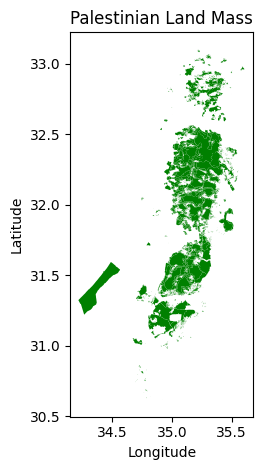

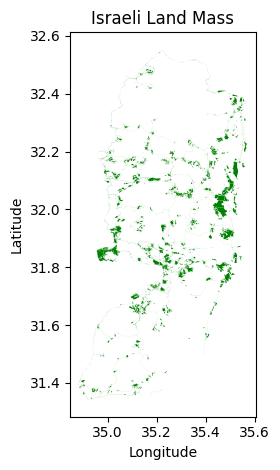

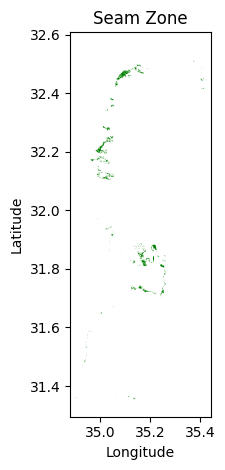

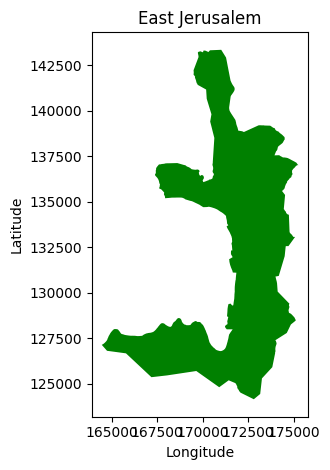

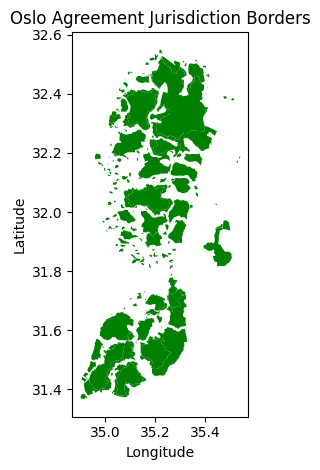

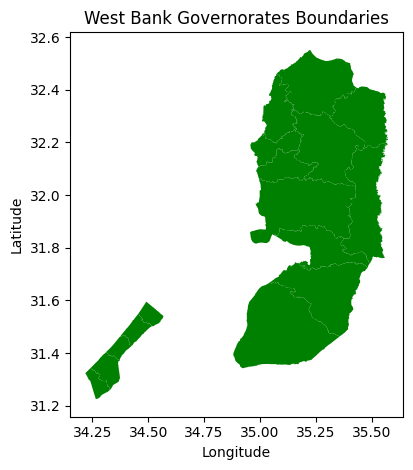

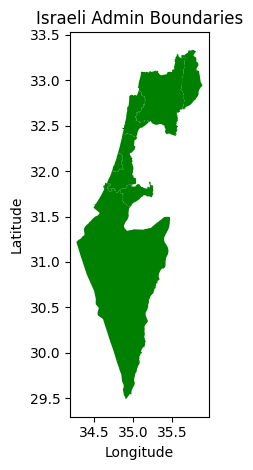

In [14]:
for gdf_name, gdf in gdf_dict.items():
  gdf.plot(facecolor = "green")
  plt.title(f"{gdf_name}")
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.tight_layout()
  print('\n')

Make Geometries Valid

In [15]:
# Fix Geometry
Palestinian_Land_Mass['geometry'] = Palestinian_Land_Mass.geometry.apply(make_valid)
Seam_Zone['geometry'] = Seam_Zone.geometry.apply(make_valid)
East_Jerusalem['geometry'] = East_Jerusalem.geometry.apply(make_valid)
Oslo_Agreement['geometry'] = Oslo_Agreement.geometry.apply(make_valid)
Governorates['geometry'] = Governorates.geometry.apply(make_valid)
Admin_IP['geometry'] = Admin_IP.geometry.apply(make_valid)
Israeli_Land_Mass['geometry'] = Israeli_Land_Mass.geometry.apply(make_valid)

Change CRS for Area Calculation to Palestine 1923

In [16]:
for gdf_name, gdf in gdf_dict.items():
  gdf_dict[gdf_name] = gdf.to_crs(epsg = 28191) # Palestine 1923 / Palestine Grid
  print(f"CRS for {gdf_name}: {gdf_dict[gdf_name].crs}")
  #gdf.plot(facecolor = "green")
  #plt.title(f"{gdf_name}")
  #plt.xlabel('Longitude')
  #plt.ylabel('Latitude')
  #plt.tight_layout()
  #print('\n')

CRS for Palestinian Land Mass: EPSG:28191
CRS for Israeli Land Mass: EPSG:28191
CRS for Seam Zone: EPSG:28191
CRS for East Jerusalem: EPSG:28191
CRS for Oslo Agreement Jurisdiction Borders: EPSG:28191
CRS for West Bank Governorates Boundaries: EPSG:28191
CRS for Israeli Admin Boundaries: EPSG:28191


In [17]:
for gdf_name, gdf in gdf_dict.items():
    gdf['Area_sqmi'] = gdf['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR  # Palestine 1923 / Palestine Grid, convert square meters to square miles

# update the geodataframes and print them
Palestinian_Land_Mass = gdf_dict["Palestinian Land Mass"]
print("Palestinian Land Mass:")
print(Palestinian_Land_Mass.head())

Israeli_Land_Mass = gdf_dict["Israeli Land Mass"]
print("Israeli Land Mass:")
print(Israeli_Land_Mass.head())

Seam_Zone = gdf_dict["Seam Zone"]
print("\nSeam Zone:")
print(Seam_Zone.head())

East_Jerusalem = gdf_dict["East Jerusalem"]
print("\nEast Jerusalem:")
print(East_Jerusalem.head())

Oslo_Agreement = gdf_dict["Oslo Agreement Jurisdiction Borders"]
print("\nOslo Agreement Jurisdiction Borders:")
print(Oslo_Agreement.head())

Governorates = gdf_dict["West Bank Governorates Boundaries"]
print("\nWest Bank Governorates Boundaries:")
print(Governorates.head())

Admin_IP = gdf_dict["Israeli Admin Boundaries"]
print("\nIsraeli Admin Boundaries:")
print(Admin_IP.head())

Palestinian Land Mass:
      id                                display          governorate class  \
0   9787  Palestinian Controlled Land in Area A   Hebron Governorate     A   
1  10149   Palestinian Developed Land in Area C   Hebron Governorate     C   
2  10750   Palestinian Developed Land in Area C   Hebron Governorate     C   
3   4110   Palestinian Developed Land in Area C  Jericho Governorate     C   
4  10753   Palestinian Developed Land in Area C   Hebron Governorate     C   

                                            geometry     Area_sqmi  
0  MULTIPOLYGON (((170227.902 97534.544, 170213.0...  2.768039e+01  
1  MULTIPOLYGON (((155215.163 118632.601, 155247....  6.166887e-01  
2  MULTIPOLYGON (((163051.128 116263.559, 163060....  1.932643e-01  
3  MULTIPOLYGON (((193318.888 144160.669, 193318....  3.637864e-15  
4  MULTIPOLYGON (((163576.137 117207.787, 163555....  1.351542e-01  
Israeli Land Mass:
     id                           display          governorate class  \
0  

Initialize Summary Statistics DataFrame

In [18]:
summary_statistics_df = pd.DataFrame({'class': ['IP', 'A', 'B', 'C', 'Gaza Strip', 'H1', 'H2', 'Nature Reserve', 'East Jerusalem'], 'total_area_of_boundaries': [0,0,0,0,0,0,0,0,0],'sum_area_sqmi': [0,0,0,0,0,0,0,0,0], 'percentage': [0,0,0,0,0,0,0,0,0]})

summary_statistics_df["total_area_of_boundaries"] = summary_statistics_df["total_area_of_boundaries"].astype(float)
summary_statistics_df["sum_area_sqmi"] = summary_statistics_df["sum_area_sqmi"].astype(float)
summary_statistics_df["percentage"] = summary_statistics_df["percentage"].astype(float)

summary_statistics_df.head(summary_statistics_df.shape[0])

,class,total_area_of_boundaries,sum_area_sqmi,percentage
0,IP,0.0,0.0,0.0
1,A,0.0,0.0,0.0
2,B,0.0,0.0,0.0
3,C,0.0,0.0,0.0
4,Gaza Strip,0.0,0.0,0.0
5,H1,0.0,0.0,0.0
6,H2,0.0,0.0,0.0
7,Nature Reserve,0.0,0.0,0.0
8,East Jerusalem,0.0,0.0,0.0


Aggregate the total area of each boundary

In [19]:
israel_proper_area = Admin_IP['Area_sqmi'].groupby(Admin_IP['class']).sum().iloc[0] - East_Jerusalem['Area_sqmi'].iloc[0] # total area for Israel proper excluding golan heights with east jeusalem so delete it
area_a_area = Oslo_Agreement['Area_sqmi'].groupby(Oslo_Agreement['CLASS']).sum().iloc[0] # total area for Area A
area_b_area = Oslo_Agreement['Area_sqmi'].groupby(Oslo_Agreement['CLASS']).sum().iloc[1] # total area for Area B
area_h1_area = Oslo_Agreement['Area_sqmi'].groupby(Oslo_Agreement['CLASS']).sum().iloc[2] # total area for Area H1
area_h2_area = Oslo_Agreement['Area_sqmi'].groupby(Oslo_Agreement['CLASS']).sum().iloc[3] # total area for Area H2
nature_reserve_area = Oslo_Agreement['Area_sqmi'].groupby(Oslo_Agreement['CLASS']).sum().iloc[4] # total area for the Nature Reserve
east_jerusalem_area = East_Jerusalem['Area_sqmi'].iloc[0]  # total area for the East Jerusalem
Governorates["Governorates_Code"] = Governorates["Governorates_Code"].astype(int)
gaza_strip_area = Governorates['Area_sqmi'].groupby(Governorates["Governorates_Code"] > 2000).sum().iloc[1] # total area for the gaza strip
west_bank_area = Governorates['Area_sqmi'].groupby(Governorates["Governorates_Code"] > 2000).sum().iloc[0] # gets all the aggregated false (west bank) values
west_bank_no_east_jerusalem_area = west_bank_area - east_jerusalem_area
area_c_area = west_bank_no_east_jerusalem_area - area_a_area - area_b_area - area_h1_area - area_h2_area - nature_reserve_area

# assign each row to their corresponding area

summary_statistics_df.loc[0, "total_area_of_boundaries"] = israel_proper_area
summary_statistics_df.loc[1, "total_area_of_boundaries"] = area_a_area
summary_statistics_df.loc[2, "total_area_of_boundaries"] = area_b_area
summary_statistics_df.loc[3, "total_area_of_boundaries"] = area_c_area
summary_statistics_df.loc[4, "total_area_of_boundaries"] = gaza_strip_area
summary_statistics_df.loc[5, "total_area_of_boundaries"] = area_h1_area
summary_statistics_df.loc[6, "total_area_of_boundaries"] = area_h2_area
summary_statistics_df.loc[7, "total_area_of_boundaries"] = nature_reserve_area
summary_statistics_df.loc[8, "total_area_of_boundaries"] = east_jerusalem_area



summary_statistics_df.head(summary_statistics_df.shape[0])

,class,total_area_of_boundaries,sum_area_sqmi,percentage
0,IP,8087.770863,0.0,0.0
1,A,379.289372,0.0,0.0
2,B,399.666127,0.0,0.0
3,C,1304.523882,0.0,0.0
4,Gaza Strip,140.908859,0.0,0.0
5,H1,8.174373,0.0,0.0
6,H2,1.764640,0.0,0.0
7,Nature Reserve,64.322689,0.0,0.0
8,East Jerusalem,27.732566,0.0,0.0


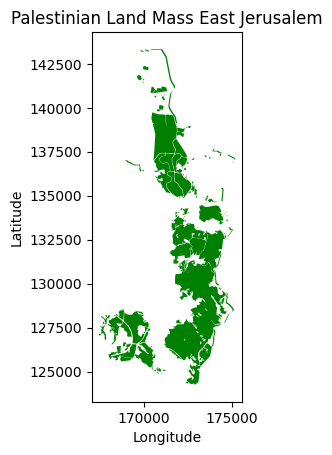

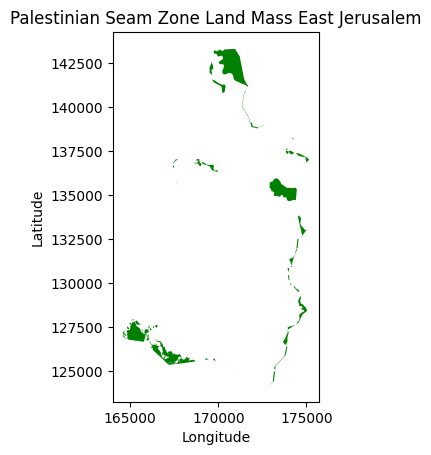

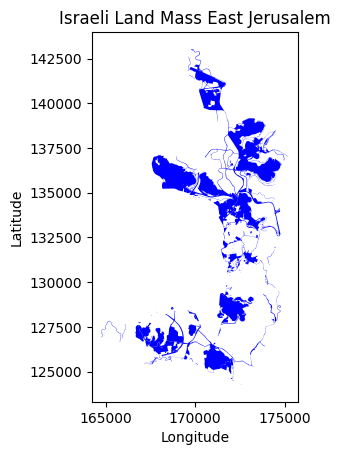

In [20]:
East_Jerusalem['geometry'] = East_Jerusalem.geometry.apply(make_valid)
Palestinian_Land_Mass['geometry'] = Palestinian_Land_Mass.geometry.apply(make_valid)
Seam_Zone['geometry'] = Seam_Zone.geometry.apply(make_valid)
Israeli_Land_Mass['geometry'] = Israeli_Land_Mass.geometry.apply(make_valid)
Palestinian_Land_Mass_East_Jerusalem = gpd.clip(Palestinian_Land_Mass, East_Jerusalem)
Palestinian_Land_Mass_East_Jerusalem.plot(facecolor = "green")
plt.title(f"Palestinian Land Mass East Jerusalem")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Palestinian_Seam_Zone_East_Jerusalem = gpd.clip(Seam_Zone, East_Jerusalem)
Palestinian_Seam_Zone_East_Jerusalem.plot(facecolor = "green")
plt.title(f"Palestinian Seam Zone Land Mass East Jerusalem")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Israeli_Land_Mass_East_Jerusalem = gpd.clip(Israeli_Land_Mass, East_Jerusalem)
Israeli_Land_Mass_East_Jerusalem.plot(facecolor = "blue")
plt.title(f"Israeli Land Mass East Jerusalem")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [21]:
Palestinian_Seam_Zone_East_Jerusalem.head()

,id,display,governorate,class,geometry,Area_sqmi
6,742,Palestinian Developed Land in Seam Zone (Area C),Bethlehem Governorate,C,"MULTIPOLYGON (((172884.076 124238.111, 172957....",0.108987
41,743,Palestinian Developed Land in Seam Zone (Area C),Jerusalem Governorate,C,"POLYGON ((170965.64 124871.037, 170986.034 124...",0.066404
58,845,Palestinian Developed Land in Seam Zone (Area C),Jerusalem Governorate,C,"MULTIPOLYGON (((171135.038 124991.262, 171142....",0.013595
40,741,Palestinian Developed Land in Seam Zone (Area C),Jerusalem Governorate,C,"POLYGON ((173234.355 125316.934, 173753.247 12...",0.242849
60,847,Palestinian Developed Land in Seam Zone (East ...,Jerusalem Governorate,EJ,"POLYGON ((173805.115 126902.292, 173859.949 12...",0.036702


Get Total Palestinian developed land area in East Jerusalem

In [22]:
# check crs
print(Palestinian_Land_Mass_East_Jerusalem.crs)
print(Palestinian_Seam_Zone_East_Jerusalem.crs)
Palestinian_Land_Mass_East_Jerusalem['Area_sqmi'] = Palestinian_Land_Mass_East_Jerusalem['geometry'].area * CONVERSION_FACTOR #sqmi
Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi'] = Palestinian_Seam_Zone_East_Jerusalem['geometry'].area * CONVERSION_FACTOR #sqmi
Palestinian_Land_Mass_EJ_area = Palestinian_Land_Mass_East_Jerusalem['Area_sqmi'].sum()
#print(Palestinian_Land_Mass_East_Jerusalem['Area_sqmi'].groupby(Palestinian_Land_Mass_East_Jerusalem['class']).sum())
Palestinian_Land_Mass_Seam_Zone_EJ_area = Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi'].sum()
#print(Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi'].groupby(Palestinian_Seam_Zone_East_Jerusalem['class']).sum())
total_palestinian_developed_land_east_jerusalem = Palestinian_Land_Mass_EJ_area + Palestinian_Land_Mass_Seam_Zone_EJ_area
print(f'Total Palestinian developed land in East Jerusalem: {total_palestinian_developed_land_east_jerusalem}')
print(Palestinian_Land_Mass_Seam_Zone_EJ_area)
#Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi']

EPSG:28191
EPSG:28191
Total Palestinian developed land in East Jerusalem: 13.702720630738469
2.415579079951178


Get Total Palestinian developed/controlled land area in Area A, Area b, Area C, Area H1, Area H2, the nature reserve and the gaza strip

In [23]:
total_palestinian_developed_land_israel_proper = Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['class']).sum().iloc[0]
total_palestinian_controlled_land_area_a = Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['class']).sum().iloc[1] + Seam_Zone['Area_sqmi'].groupby(Seam_Zone['class']).sum().iloc[0]
total_palestinian_controlled_land_area_b = Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['class']).sum().iloc[2] + Seam_Zone['Area_sqmi'].groupby(Seam_Zone['class']).sum().iloc[1]
total_palestinian_developed_land_area_c = Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['class']).sum().iloc[3] + Seam_Zone['Area_sqmi'].groupby(Seam_Zone['class']).sum().iloc[2]
total_palestinian_developed_land_gaza_strip = Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['class']).sum().iloc[5]
total_palestinian_controlled_land_area_h1 = Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['class']).sum().iloc[6]
total_palestinian_developed_land_area_h2 = Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['class']).sum().iloc[7]
total_palestinian_controlled_land_nature_reserve = Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['class']).sum().iloc[8]
print(Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['class']).sum())
#Seam_Zone['Area_sqmi'].groupby(Seam_Zone['class']).sum()
print(Palestinian_Land_Mass['Area_sqmi'].groupby(Palestinian_Land_Mass['class']).sum().iloc[5])

class
48                430.592977
A                 379.191054
B                 398.865758
C                 393.590201
EJ                 11.124799
Gaza Strip        138.234256
H1                  8.164811
H2                  1.715713
Nature Reserve     64.291876
Name: Area_sqmi, dtype: float64
138.2342564163857



Assign each row to their corresponding area

In [24]:
print(total_palestinian_controlled_land_area_b)
print(total_palestinian_developed_land_gaza_strip)

summary_statistics_df.loc[0, "sum_area_sqmi"] = total_palestinian_developed_land_israel_proper
summary_statistics_df.loc[1, "sum_area_sqmi"] = total_palestinian_controlled_land_area_a
summary_statistics_df.loc[2, "sum_area_sqmi"] = total_palestinian_controlled_land_area_b
summary_statistics_df.loc[3, "sum_area_sqmi"] = total_palestinian_developed_land_area_c
summary_statistics_df.loc[4, "sum_area_sqmi"] = total_palestinian_developed_land_gaza_strip
summary_statistics_df.loc[5, "sum_area_sqmi"] = total_palestinian_controlled_land_area_h1
summary_statistics_df.loc[6, "sum_area_sqmi"] = total_palestinian_developed_land_area_h2
summary_statistics_df.loc[7, "sum_area_sqmi"] = total_palestinian_controlled_land_nature_reserve
summary_statistics_df.loc[8, "sum_area_sqmi"] = total_palestinian_developed_land_east_jerusalem
summary_statistics_df.head(summary_statistics_df.shape[0])

399.4798854159672
138.2342564163857


,class,total_area_of_boundaries,sum_area_sqmi,percentage
0,IP,8087.770863,430.592977,0.0
1,A,379.289372,379.257358,0.0
2,B,399.666127,399.479885,0.0
3,C,1304.523882,407.895472,0.0
4,Gaza Strip,140.908859,138.234256,0.0
5,H1,8.174373,8.164811,0.0
6,H2,1.764640,1.715713,0.0
7,Nature Reserve,64.322689,64.291876,0.0
8,East Jerusalem,27.732566,13.702721,0.0


Calculate Percentage

In [25]:
summary_statistics_df['percentage'] = (summary_statistics_df["sum_area_sqmi"] / summary_statistics_df["total_area_of_boundaries"]) * 100

summary_statistics_df['percentage_of_west_bank'] =  (summary_statistics_df["total_area_of_boundaries"] / west_bank_area) * 100

summary_statistics_df.head(summary_statistics_df.shape[0])
#Ignore Israel Proper

,class,total_area_of_boundaries,sum_area_sqmi,percentage,percentage_of_west_bank
0,IP,8087.770863,430.592977,5.324001,370.069475
1,A,379.289372,379.257358,99.991560,17.355019
2,B,399.666127,399.479885,99.953401,18.287392
3,C,1304.523882,407.895472,31.267766,59.690671
4,Gaza Strip,140.908859,138.234256,98.101892,6.447520
5,H1,8.174373,8.164811,99.883037,0.374032
6,H2,1.764640,1.715713,97.227357,0.080744
7,Nature Reserve,64.322689,64.291876,99.952095,2.943192
8,East Jerusalem,27.732566,13.702721,49.410216,1.268950


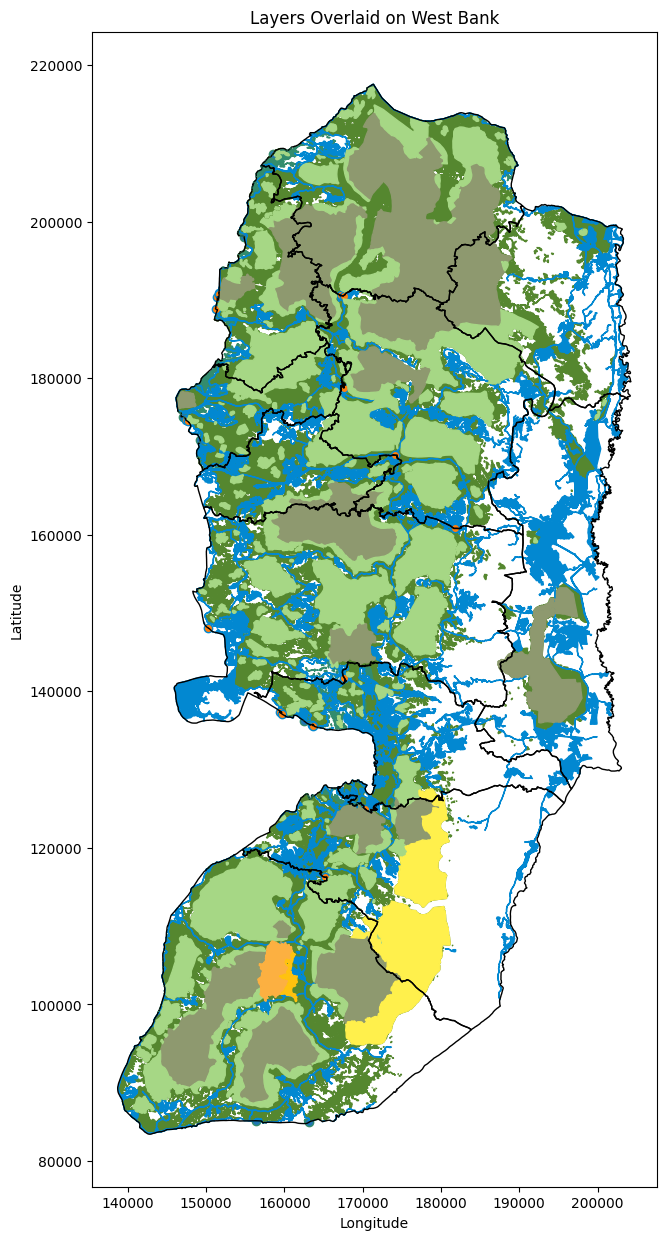

C:\Users\karim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
# Clip each layer to the West Bank
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000] # West bank 
Palestinian_Land_Mass_clipped = gpd.clip(Palestinian_Land_Mass, West_Bank_Governorates)
Seam_Zone_clipped = gpd.clip(Seam_Zone, West_Bank_Governorates)
Oslo_Agreement_clipped = gpd.clip(Oslo_Agreement, West_Bank_Governorates)
Israeli_Land_Mass_clipped = gpd.clip(Israeli_Land_Mass, West_Bank_Governorates)

# Define custom color palette
palette_color = {
    'A': '#8e996f', 
    'B': '#a6d785', 
    'H1': '#fcb041', 
    'H2': '#ffc20f', 
    'Nature Reserve': '#FFF04C'
}

# Plot for Visualization
fig, ax = plt.subplots(figsize=(15, 15))


# Plot Seam Zone layer
Seam_Zone_clipped.plot(ax=ax, facecolor='#338c6d', edgecolor='#338c6d', label='Seam Zone')

# Plot Palestinian Land Mass layer
Palestinian_Land_Mass_clipped.plot(ax=ax, facecolor='#55872F', edgecolor='#55872F', label='Palestinian Land Mass')

# Plot Israeli Land Mass layer
Israeli_Land_Mass_clipped.plot(ax=ax, facecolor='#0288d1', edgecolor='#0288d1', label = 'Israeli Land Mass')

# Plot Oslo layer with opacity and color by classes
for class_name, color in palette_color.items():
    Oslo_Agreement_clipped[Oslo_Agreement_clipped['CLASS'] == class_name].plot(ax=ax, facecolor=color, edgecolor=color, label=class_name)
# Plot Governorates layer
West_Bank_Governorates.plot(ax=ax, facecolor='none', edgecolor='black', label='West Bank Governorates')

plt.title('Layers Overlaid on West Bank')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Calculate Area for clipped layer
Palestinian_Land_Mass_clipped['Area_sqmi'] = Palestinian_Land_Mass_clipped['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Seam_Zone_clipped['Area_sqmi'] = Seam_Zone_clipped['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Israeli_Land_Mass_clipped['Area_sqmi'] = Israeli_Land_Mass_clipped['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
West_Bank_Governorates['Area_sqmi'] = West_Bank_Governorates['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR 
# Calculate the land mass in areas a, b, c etc..

area_a_seam_zone = Seam_Zone_clipped[Seam_Zone_clipped['class'] == 'A']['Area_sqmi'].sum()
area_b_seam_zone = Seam_Zone_clipped[Seam_Zone_clipped['class'] == 'B']['Area_sqmi'].sum()
area_c_seam_zone = Seam_Zone_clipped[Seam_Zone_clipped['class'] == 'C']['Area_sqmi'].sum()

area_a_area = Palestinian_Land_Mass_clipped[Palestinian_Land_Mass_clipped['class'] == 'A']['Area_sqmi'].sum() + area_a_seam_zone
area_b_area = Palestinian_Land_Mass_clipped[Palestinian_Land_Mass_clipped['class'] == 'B']['Area_sqmi'].sum() + area_b_seam_zone
area_c_area = Palestinian_Land_Mass_clipped[Palestinian_Land_Mass_clipped['class'] == 'C']['Area_sqmi'].sum() + area_c_seam_zone # for total Palestinian land in Area C

area_h1_area = Palestinian_Land_Mass_clipped[Palestinian_Land_Mass_clipped['class'] == 'H1']['Area_sqmi'].sum()
area_h2_area = Palestinian_Land_Mass_clipped[Palestinian_Land_Mass_clipped['class'] == 'H2']['Area_sqmi'].sum()
nature_reserve_area = Palestinian_Land_Mass_clipped[Palestinian_Land_Mass_clipped['class'] == 'Nature Reserve']['Area_sqmi'].sum()

israeli_area_h1_area = Israeli_Land_Mass_clipped[Israeli_Land_Mass_clipped['class'] == 'H1']['Area_sqmi'].sum()
israeli_area_h2_area = Israeli_Land_Mass_clipped[Israeli_Land_Mass_clipped['class'] == 'H2']['Area_sqmi'].sum()
israeli_area_c_area = Israeli_Land_Mass_clipped[Israeli_Land_Mass_clipped['class'] == 'C']['Area_sqmi'].sum()
israeli_area_b_area = Israeli_Land_Mass_clipped[Israeli_Land_Mass_clipped['class'] == 'B']['Area_sqmi'].sum()
israeli_area_a_area = Israeli_Land_Mass_clipped[Israeli_Land_Mass_clipped['class'] == 'A']['Area_sqmi'].sum()
israeli_nature_reserve_area = Israeli_Land_Mass_clipped[Israeli_Land_Mass_clipped['class'] == 'Nature Reserve']['Area_sqmi'].sum()
total_gov_area = West_Bank_Governorates["Area_sqmi"].sum() - east_jerusalem_area # East Jerusalem not included

undeveloped_area_c = total_gov_area - area_a_area - area_b_area - area_c_area - area_h1_area - area_h2_area - nature_reserve_area - israeli_area_c_area - israeli_area_b_area - israeli_area_a_area - israeli_nature_reserve_area

# declaring data from land mass calculations
data = [area_a_area, area_b_area, area_c_area, area_h1_area, area_h2_area, nature_reserve_area, israeli_area_c_area, israeli_area_a_area, israeli_area_b_area, israeli_area_h1_area, israeli_area_h2_area, israeli_nature_reserve_area, undeveloped_area_c]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#8e996f', 'Palestinian Area B' : '#a6d785', 'Palestinian Area C' : '#55872F', 'Palestinian Area H1' : '#fcb041', 'Palestinian Area H2' : '#ffc20f', 'Palestinian Nature Reserve' : '#FFF04C', 'Israeli Area C' : '#0061b8', 'Israeli Area A' : '#7A9DA2',  'Israeli Area B' : '#79AA9D', 'Israeli Area H1': '#B1A88B', 'Israeli Area H2' : '#B3B172', 'Israeli Nature Reserve' : '#B3C890', 'Undeveloped Area C' : '#42413F'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 3)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'West Bank Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*The amount of land developed was calculated for Palestinian land in Area C and H2 as well as <br> Israeli land in Area A, B, C, the Nature Reserve, H1 and H2 while the amount of land controlled was calculated for <br> Palestinian land in Area A, B, H1, and the Nature Reserve as per the interim agreements. East Jerusalem was not included in the calculations.",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text=f"{month} {year}<br>© Palestinian Land Demographics {year}",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html(f'{month}{year}\PieCharts_HTML\West_Bank_Area_Distribution_Pie_Chart.html')
fig.write_image(f'{month}{year}\PieCharts_JPG\West_Bank_Area_Distribution_Pie_Chart.jpg')
fig.show()


Automate the Pie Charts

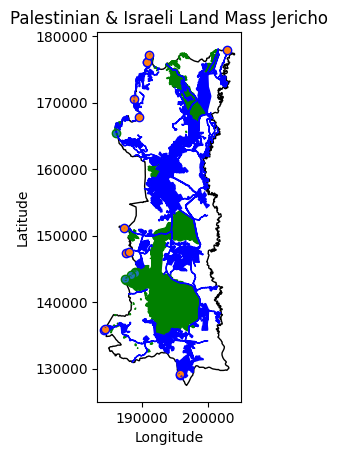

233    2.314677e-02
235    1.356730e-03
236    1.430559e-02
237    2.189147e-02
487    3.944463e-02
           ...     
452    3.289959e-02
316    2.201022e-06
293    3.938752e-03
26     3.107261e-06
33     9.648789e-07
Name: Area_sqmi, Length: 122, dtype: float64

In [27]:
# Jericho Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Jericho_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Jericho']
# Clip to Governorate
Jericho_palestinian_land_mass = gpd.clip(Palestinian_Land_Mass, Jericho_gov)
Jericho_israeli_land_mass = gpd.clip(Israeli_Land_Mass, Jericho_gov)
# Calculate Area for clipped layers
Jericho_palestinian_land_mass['Area_sqmi'] = Jericho_palestinian_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Jericho_israeli_land_mass['Area_sqmi'] = Jericho_israeli_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
# Plot for visualization
fig, ax = plt.subplots()
Jericho_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Jericho Governorate") 
Jericho_palestinian_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Jericho")
Jericho_israeli_land_mass.plot(ax =ax, facecolor="blue", edgecolor="blue", label = "Israeli Land Mass in Jericho")
plt.title(f"Palestinian & Israeli Land Mass Jericho")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Calculate the land mass in areas a, b, c etc..
Jericho_gov_area_a_area = Jericho_palestinian_land_mass[Jericho_palestinian_land_mass['class'] == 'A']['Area_sqmi'].sum()
Jericho_gov_area_b_area = Jericho_palestinian_land_mass[Jericho_palestinian_land_mass['class'] == 'B']['Area_sqmi'].sum()
Jericho_gov_area_c_area = Jericho_palestinian_land_mass[Jericho_palestinian_land_mass['class'] == 'C']['Area_sqmi'].sum()
Jericho_gov_area_c_israeli_area = Jericho_israeli_land_mass[Jericho_israeli_land_mass['class'] == 'C']['Area_sqmi'].sum()
Jericho_gov_area_a_israeli_area = Jericho_israeli_land_mass[Jericho_israeli_land_mass['class'] == 'A']['Area_sqmi'].sum()
Jericho_gov_area = Governorates[Governorates["Governorates_Name"] == "Jericho"]["Area_sqmi"].iloc[0]
undeveloped_area_c = Jericho_gov_area - Jericho_gov_area_a_area - Jericho_gov_area_b_area - Jericho_gov_area_c_area - Jericho_gov_area_c_israeli_area - Jericho_gov_area_a_israeli_area

# declaring data from land mass calculations
data = [Jericho_gov_area_a_area, Jericho_gov_area_b_area, Jericho_gov_area_c_area, Jericho_gov_area_c_israeli_area, Jericho_gov_area_a_israeli_area, undeveloped_area_c]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#8e996f', 'Palestinian Area B' : '#a6d785', 'Palestinian Area C' : '#55872F', 'Israeli Area C' : '#0061b8', 'Israeli Area A' : '#7A9DA2', 'Undeveloped Area C' : '#42413F'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 3)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent'        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    )      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': f'Jericho Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*The amount of land developed was calculated for Palestinian land in Area C as well as Israeli land in Area A and C <br> while the amount of land controlled was calculated for Palestinian land in Area A and B as per the interim agreements",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text=f"{month} {year}<br>© Palestinian Land Demographics {year}",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html(f'{month}{year}\PieCharts_HTML\Jericho_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image(f'{month}{year}\PieCharts_JPG\Jericho_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()
Jericho_palestinian_land_mass[Jericho_palestinian_land_mass['class'] == 'C']['Area_sqmi']


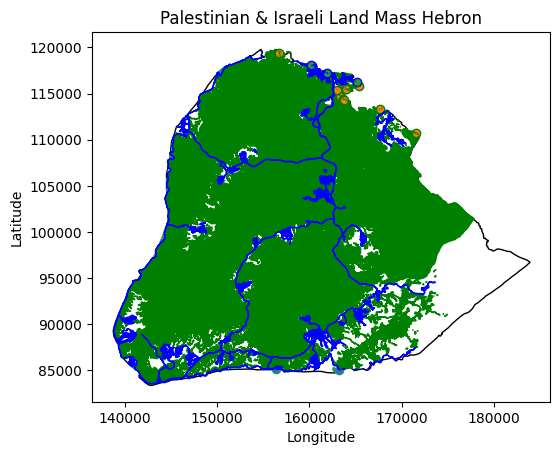

In [28]:
# Hebron Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Hebron_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Hebron']
# Clip to Governorate
Hebron_palestinian_land_mass = gpd.clip(Palestinian_Land_Mass, Hebron_gov)
Hebron_seam_zone = gpd.clip(Seam_Zone, Hebron_gov)
Hebron_israeli_land_mass = gpd.clip(Israeli_Land_Mass, Hebron_gov)
# Calculate Area for clipped layer
Hebron_palestinian_land_mass['Area_sqmi'] = Hebron_palestinian_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Hebron_seam_zone['Area_sqmi'] = Hebron_seam_zone['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Hebron_israeli_land_mass['Area_sqmi'] = Hebron_israeli_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
# Plot for Visualization
fig, ax = plt.subplots()
Hebron_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Hebron Governorate")
Hebron_seam_zone.plot(ax=ax, facecolor = "#338c6d", edgecolor = "#338c6d", label = "Palestinian Seam Zone in Hebron")
Hebron_palestinian_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Hebron")
Hebron_israeli_land_mass.plot(ax = ax, facecolor = "blue", edgecolor = "blue", label = "Israeli Land Mass in Hebron")

plt.title(f"Palestinian & Israeli Land Mass Hebron")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc..
Hebron_gov_area_a_area = Hebron_palestinian_land_mass[Hebron_palestinian_land_mass['class'] == 'A']['Area_sqmi'].sum()
Hebron_gov_area_b_area = Hebron_palestinian_land_mass[Hebron_palestinian_land_mass['class'] == 'B']['Area_sqmi'].sum()
Hebron_area_c_seam_zone = Hebron_seam_zone[Hebron_seam_zone['class'] == 'C']['Area_sqmi'].sum()
Hebron_gov_area_c_area = Hebron_palestinian_land_mass[Hebron_palestinian_land_mass['class'] == 'C']['Area_sqmi'].sum() + Hebron_area_c_seam_zone # for total Palestinian land in Area C
Hebron_gov_area_h1_area = Hebron_palestinian_land_mass[Hebron_palestinian_land_mass['class'] == 'H1']['Area_sqmi'].sum()
Hebron_gov_area_h2_area = Hebron_palestinian_land_mass[Hebron_palestinian_land_mass['class'] == 'H2']['Area_sqmi'].sum()
Hebron_gov_nature_reserve_area = Hebron_palestinian_land_mass[Hebron_palestinian_land_mass['class'] == 'Nature Reserve']['Area_sqmi'].sum()

Hebron_gov_israeli_area_h1_area = Hebron_israeli_land_mass[Hebron_israeli_land_mass['class'] == 'H1']['Area_sqmi'].sum()
Hebron_gov_israeli_area_h2_area = Hebron_israeli_land_mass[Hebron_israeli_land_mass['class'] == 'H2']['Area_sqmi'].sum()
Hebron_gov_israeli_area_c_area = Hebron_israeli_land_mass[Hebron_israeli_land_mass['class'] == 'C']['Area_sqmi'].sum()
Hebron_gov_israeli_nature_reserve_area = Hebron_israeli_land_mass[Hebron_israeli_land_mass['class'] == 'Nature Reserve']['Area_sqmi'].sum()
Hebron_gov_area = Governorates[Governorates["Governorates_Name"] == "Hebron"]["Area_sqmi"].iloc[0]

undeveloped_area_c = Hebron_gov_area - Hebron_gov_area_a_area - Hebron_gov_area_b_area - Hebron_gov_area_c_area - Hebron_gov_area_h1_area - Hebron_gov_area_h2_area - Hebron_gov_nature_reserve_area - Hebron_gov_israeli_area_c_area - Hebron_gov_israeli_nature_reserve_area

# declaring data from land mass calculations
data = [Hebron_gov_area_a_area, Hebron_gov_area_b_area, Hebron_gov_area_c_area, Hebron_gov_area_h1_area, Hebron_gov_area_h2_area, Hebron_gov_nature_reserve_area, Hebron_gov_israeli_area_c_area, Hebron_gov_israeli_area_h1_area, Hebron_gov_israeli_area_h2_area, Hebron_gov_israeli_nature_reserve_area, undeveloped_area_c]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#8e996f', 'Palestinian Area B' : '#a6d785', 'Palestinian Area C' : '#55872F', 'Palestinian Area H1' : '#fcb041', 'Palestinian Area H2' : '#ffc20f', 'Palestinian Nature Reserve' : '#FFF04C', 'Israeli Area C' : '#0061b8', 'Israeli Area H1': '#B1A88B', 'Israeli Area H2' : '#B3B172', 'Israeli Nature Reserve' : '#B3C890', 'Undeveloped Area C' : '#42413F'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 3)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Hebron Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*The amount of land developed was calculated for Palestinian land in Area C and H2 as well as Israeli land in Area A, C, the Nature Reserve, H1 and H2 <br> while the amount of land controlled was calculated for Palestinian land in Area A, B, H1, and the Nature Reserve as per the interim agreements <br> 0.0 means less than 0.001",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text=f"{month} {year}<br>© Palestinian Land Demographics {year}",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html(f'{month}{year}\PieCharts_HTML\Hebron_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image(f'{month}{year}\PieCharts_JPG\Hebron_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()



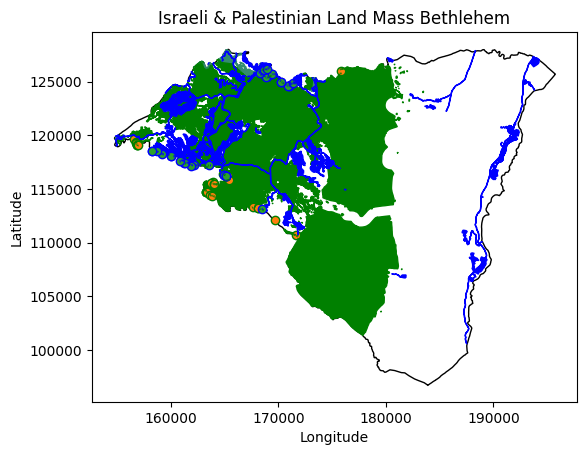

253.04564228035608


In [29]:

# Bethlehem Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Bethlehem_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Bethlehem']
# Clip to Governorate
Bethlehem_palestinian_land_mass = gpd.clip(Palestinian_Land_Mass, Bethlehem_gov)
Bethlehem_seam_zone = gpd.clip(Seam_Zone, Bethlehem_gov)
Bethlehem_israeli_land_mass = gpd.clip(Israeli_Land_Mass, Bethlehem_gov)
# Calculate Area for clipped layer
Bethlehem_palestinian_land_mass['Area_sqmi'] = Bethlehem_palestinian_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Bethlehem_seam_zone['Area_sqmi'] = Bethlehem_seam_zone['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Bethlehem_israeli_land_mass['Area_sqmi'] = Bethlehem_israeli_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
# Plot for Visualization
fig, ax = plt.subplots()
Bethlehem_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Bethlehem Governorate")
Bethlehem_seam_zone.plot(ax=ax, facecolor = "#338c6d", edgecolor = "#338c6d", label = "Palestinian Seam Zone in Bethlehem")
Bethlehem_palestinian_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Bethlehem")
Bethlehem_israeli_land_mass.plot(ax = ax, facecolor = "blue", edgecolor = "blue", label = "Israeli Land Mass in Bethlehem")
plt.title(f"Israeli & Palestinian Land Mass Bethlehem")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc..
# Bethlehem_seam_zone['Area_sqmi'].groupby([Bethlehem_seam_zone['class']]).sum()
Bethlehem_gov_area_a_area = Bethlehem_palestinian_land_mass[Bethlehem_palestinian_land_mass['class'] == 'A']['Area_sqmi'].sum()
Bethlehem_gov_area_b_area = Bethlehem_palestinian_land_mass[Bethlehem_palestinian_land_mass['class'] == 'B']['Area_sqmi'].sum()
Bethlehem_area_c_seam_zone = Bethlehem_seam_zone[Bethlehem_seam_zone['class'] == 'C']['Area_sqmi'].sum()
Bethlehem_gov_area_c_area = Bethlehem_palestinian_land_mass[Bethlehem_palestinian_land_mass['class'] == 'C']['Area_sqmi'].sum() + Bethlehem_area_c_seam_zone # for total Palestinian land in Area C
Bethlehem_gov_nature_reserve_area = Bethlehem_palestinian_land_mass[Bethlehem_palestinian_land_mass['class'] == 'Nature Reserve']['Area_sqmi'].sum()

Bethlehem_gov_israeli_area_c_area = Bethlehem_israeli_land_mass[Bethlehem_israeli_land_mass['class'] == 'C']['Area_sqmi'].sum()
Bethlehem_gov_israeli_area_a_area = Bethlehem_israeli_land_mass[Bethlehem_israeli_land_mass['class'] == 'A']['Area_sqmi'].sum()
Bethlehem_gov_israeli_area_b_area = Bethlehem_israeli_land_mass[Bethlehem_israeli_land_mass['class'] == 'B']['Area_sqmi'].sum()
Bethlehem_gov_israeli_area_nature_reserve_area = Bethlehem_israeli_land_mass[Bethlehem_israeli_land_mass['class'] == 'Nature Reserve']['Area_sqmi'].sum()
Bethlehem_gov_area = Governorates[Governorates["Governorates_Name"] == "Bethlehem"]["Area_sqmi"].iloc[0]
print(Bethlehem_gov_area)
undeveloped_area_c = Bethlehem_gov_area - Bethlehem_gov_area_a_area - Bethlehem_gov_area_b_area - Bethlehem_gov_area_c_area - Bethlehem_gov_nature_reserve_area - Bethlehem_gov_israeli_area_c_area - Bethlehem_gov_israeli_area_a_area - Bethlehem_gov_israeli_area_b_area - Bethlehem_gov_israeli_area_nature_reserve_area 

# declaring data from land mass calculations
data = [Bethlehem_gov_area_a_area, Bethlehem_gov_area_b_area, Bethlehem_gov_area_c_area, Bethlehem_gov_nature_reserve_area, Bethlehem_gov_israeli_area_c_area, Bethlehem_gov_israeli_area_a_area, Bethlehem_gov_israeli_area_b_area, Bethlehem_gov_israeli_area_nature_reserve_area, undeveloped_area_c]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#8e996f', 'Palestinian Area B' : '#a6d785', 'Palestinian Area C' : '#55872F','Palestinian Nature Reserve' : '#FFF04C', 'Israeli Area C' : '#0061b8', 'Israeli Area A' : '#7A9DA2',  'Israeli Area B' : '#79AA9D', 'Israeli Nature Reserve' : '#B3C890', 'Undeveloped Area C' : '#42413F'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 3)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent'        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    )      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Bethlehem Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*The amount of land developed was calculated for Palestinian land in Area C as well as Israeli land in Area A, B, C and the Nature Reserve <br> while the amount of land controlled was calculated for Palestinian land in Area A, B and the Nature Reserve as per the interim agreements",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text=f"{month} {year}<br>© Palestinian Land Demographics {year}",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html(f'{month}{year}\PieCharts_HTML\Bethlehem_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image(f'{month}{year}\PieCharts_JPG\Bethlehem_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()



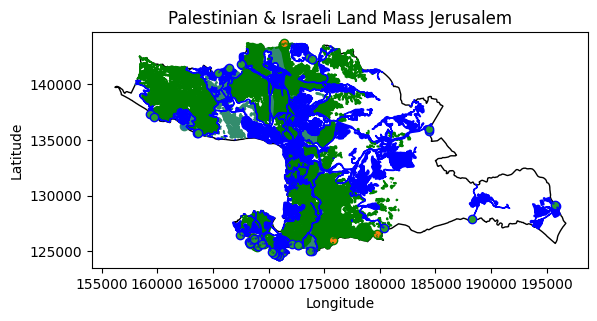

107.17035169739106


In [30]:
# Jerusalem Governorate (Not including East Jerusalem)
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Jerusalem_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Jerusalem']
# Clip to Governorate
Jerusalem_palestinian_land_mass = gpd.clip(Palestinian_Land_Mass, Jerusalem_gov)
Jerusalem_seam_zone = gpd.clip(Seam_Zone, Jerusalem_gov)
Jerusalem_israeli_land_mass = gpd.clip(Israeli_Land_Mass, Jerusalem_gov)
# Calculate Area for clipped layer
Jerusalem_palestinian_land_mass['Area_sqmi'] = Jerusalem_palestinian_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Jerusalem_seam_zone['Area_sqmi'] = Jerusalem_seam_zone['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Jerusalem_israeli_land_mass['Area_sqmi'] = Jerusalem_israeli_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
# Plot for Visualization (Includes East Jerusalem)
fig, ax = plt.subplots()
Jerusalem_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Jerusalem Governorate")
Jerusalem_seam_zone.plot(ax=ax, facecolor = "#338c6d", edgecolor = "#338c6d", label = "Palestinian Seam Zone in Jerusalem")
Jerusalem_palestinian_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Jerusalem")
Jerusalem_israeli_land_mass.plot(ax = ax, facecolor = "blue", edgecolor = "blue", label = "Israeli Land Mass in Jerusalem")
plt.title(f"Palestinian & Israeli Land Mass Jerusalem")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc.. Excludes East Jerusalem, and East Jerusalem land area
# Jerusalem_seam_zone['Area_sqmi'].groupby([Jerusalem_seam_zone['class']]).sum()
# Palestinian_Land_Mass_East_Jerusalem['Area_sqmi'].groupby(Palestinian_Land_Mass_East_Jerusalem['class']).sum()
# Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi'].groupby(Palestinian_Seam_Zone_East_Jerusalem['class']).sum()
Jerusalem_gov_area_a_area = Jerusalem_palestinian_land_mass[Jerusalem_palestinian_land_mass['class'] == 'A']['Area_sqmi'].sum() + Jerusalem_seam_zone[Jerusalem_seam_zone['class'] == 'A']['Area_sqmi'].sum()
Jerusalem_gov_area_b_area = Jerusalem_palestinian_land_mass[Jerusalem_palestinian_land_mass['class'] == 'B']['Area_sqmi'].sum() + Jerusalem_seam_zone[Jerusalem_seam_zone['class'] == 'B']['Area_sqmi'].sum()
East_Jerusalem_seam_zone_area = Palestinian_Seam_Zone_East_Jerusalem[Palestinian_Seam_Zone_East_Jerusalem['class'] == 'C']['Area_sqmi'].sum()
Jerusalem_area_c_seam_zone = Jerusalem_seam_zone[Jerusalem_seam_zone['class'] == 'C']['Area_sqmi'].sum() - East_Jerusalem_seam_zone_area # for total Palestinian land in seam zone
East_Jerusalem_area_c_area = Palestinian_Land_Mass_East_Jerusalem[Palestinian_Land_Mass_East_Jerusalem['class'] == 'C']['Area_sqmi'].sum()
Jerusalem_gov_area_c_area = Jerusalem_palestinian_land_mass[Jerusalem_palestinian_land_mass['class'] == 'C']['Area_sqmi'].sum() - East_Jerusalem_area_c_area + Jerusalem_area_c_seam_zone # for total Palestinian land in Area C
Jerusalem_gov_nature_reserve_area = Jerusalem_palestinian_land_mass[Jerusalem_palestinian_land_mass['class'] == 'Nature Reserve']['Area_sqmi'].sum()

Jerusalem_gov_israeli_area_c_area = Jerusalem_israeli_land_mass[Jerusalem_israeli_land_mass['class'] == 'C']['Area_sqmi'].sum()
Jerusalem_gov_israeli_area_a_area = Jerusalem_israeli_land_mass[Jerusalem_israeli_land_mass['class'] == 'A']['Area_sqmi'].sum()
Jerusalem_gov_israeli_area_b_area = Jerusalem_israeli_land_mass[Jerusalem_israeli_land_mass['class'] == 'B']['Area_sqmi'].sum()
Jerusalem_gov_areaNoEJ = Governorates[Governorates["Governorates_Name"] == "Jerusalem"]["Area_sqmi"].iloc[0] - east_jerusalem_area
print(Jerusalem_gov_areaNoEJ)
undeveloped_area_c = Jerusalem_gov_areaNoEJ - Jerusalem_gov_area_a_area - Jerusalem_gov_area_b_area - Jerusalem_gov_area_c_area - Jerusalem_gov_nature_reserve_area - Jerusalem_gov_israeli_area_c_area - Jerusalem_gov_israeli_area_a_area - Jerusalem_gov_israeli_area_b_area

# declaring data from land mass calculations
data = [Jerusalem_gov_area_a_area, Jerusalem_gov_area_b_area, Jerusalem_gov_area_c_area, Jerusalem_gov_nature_reserve_area, Jerusalem_gov_israeli_area_c_area, Jerusalem_gov_israeli_area_a_area, Jerusalem_gov_israeli_area_b_area, undeveloped_area_c]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#8e996f', 'Palestinian Area B' : '#a6d785', 'Palestinian Area C' : '#55872F','Palestinian Nature Reserve' : '#FFF04C', 'Israeli Area C' : '#0061b8', 'Israeli Area A' : '#7A9DA2',  'Israeli Area B' : '#79AA9D', 'Undeveloped Area C' : "#42413F"}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 3)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent'        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    )      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Jerusalem Governorate Area Distribution (Sqmi)<br><sup>East Jerusalem is not included</sup>',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*The amount of land developed was calculated for Palestinian land in Area C as well as Israeli land in Area A, B and C <br> while the amount of land controlled was calculated for Palestinian land in Area A, B and the Nature Reserve as per the interim agreements",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text=f"{month} {year}<br>© Palestinian Land Demographics {year}",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html(f'{month}{year}\PieCharts_HTML\Jerusalem_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image(f'{month}{year}\PieCharts_JPG\Jerusalem_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()


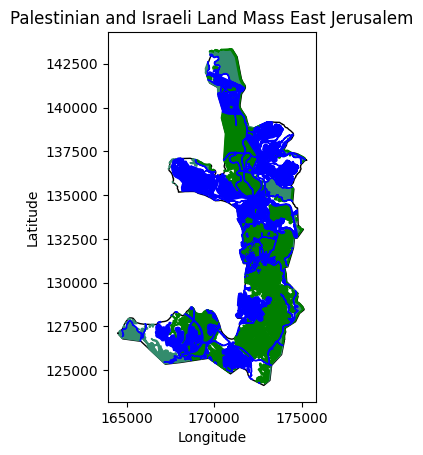

11.287141550787291
2.415579079951178
27.732565641402374


In [31]:
# East Jerusalem
# Clip to East Jerusalem
East_Jerusalem_palestinian_land_mass = gpd.clip(Palestinian_Land_Mass, East_Jerusalem) # Palestinian Land Mass in East Jerusalem
East_Jerusalem_seam_zone = gpd.clip(Seam_Zone, East_Jerusalem)
East_Jerusalem_israeli_land_mass = gpd.clip(Israeli_Land_Mass, East_Jerusalem)
#East_Jerusalem_israeli_land_mass.to_file('BoundariesFiles/East_Jerusalem_israeli_land_mass.geojson', driver = 'GeoJSON')
# Calculate Area for clipped layer
East_Jerusalem_palestinian_land_mass['Area_sqmi'] = Jerusalem_palestinian_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
East_Jerusalem_seam_zone['Area_sqmi'] = Jerusalem_seam_zone['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
East_Jerusalem_israeli_land_mass['Area_sqmi'] = East_Jerusalem_israeli_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
# Plot for Visualization (Includes East Jerusalem)
fig, ax = plt.subplots()
East_Jerusalem.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "East Jerusalem")
East_Jerusalem_seam_zone.plot(ax=ax, facecolor = "#338c6d", edgecolor = "#338c6d", label = "Palestinian Seam Zone in East Jerusalem")
East_Jerusalem_palestinian_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in East Jerusalem")
East_Jerusalem_israeli_land_mass.plot(ax = ax, facecolor = "blue", edgecolor = "blue", label = "Israeli Land Mass in East Jerusalem")
plt.title(f"Palestinian and Israeli Land Mass East Jerusalem")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



# Calculate the land mass in areas a, b, c etc.. Excludes East Jerusalem, and East Jerusalem land area
# Jerusalem_seam_zone['Area_sqmi'].groupby([Jerusalem_seam_zone['class']]).sum()
# Palestinian_Land_Mass_East_Jerusalem['Area_sqmi'].groupby(Palestinian_Land_Mass_East_Jerusalem['class']).sum()
# Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi'].groupby(Palestinian_Seam_Zone_East_Jerusalem['class']).sum()
Palestinian_Land_Mass_East_Jerusalem['Area_sqmi'] = Palestinian_Land_Mass_East_Jerusalem['geometry'].area * CONVERSION_FACTOR #sqmi
Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi'] = Palestinian_Seam_Zone_East_Jerusalem['geometry'].area * CONVERSION_FACTOR #sqmi
Israeli_Land_Mass_East_Jerusalem['Area_sqmi'] = Israeli_Land_Mass_East_Jerusalem['geometry'].area * CONVERSION_FACTOR #sqmi
Palestinian_Land_Mass_EJ_area = Palestinian_Land_Mass_East_Jerusalem['Area_sqmi'].sum()
print(Palestinian_Land_Mass_EJ_area)
Palestinian_Land_Mass_Seam_Zone_EJ_area = Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi'].sum()
print(Palestinian_Land_Mass_Seam_Zone_EJ_area)
total_palestinian_developed_land_east_jerusalem = Palestinian_Land_Mass_EJ_area + Palestinian_Land_Mass_Seam_Zone_EJ_area
total_israeli_developed_land_east_jerusalem = Israeli_Land_Mass_East_Jerusalem['Area_sqmi'].sum()
undeveloped_area_c = east_jerusalem_area - total_palestinian_developed_land_east_jerusalem - total_israeli_developed_land_east_jerusalem
print(east_jerusalem_area)
# declaring data from land mass calculations
data = [total_palestinian_developed_land_east_jerusalem, total_israeli_developed_land_east_jerusalem, undeveloped_area_c]

# Custom color palette and labels
label_color_dict = {'Land Developed by Palestinians' : '#55872F', 'Land Developed by Israelis' : '#0061b8', 'Undeveloped Land' : '#42413F'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 3)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'East Jerusalem Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text=f"{month} {year}<br>© Palestinian Land Demographics {year}",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html(f'{month}{year}\PieCharts_HTML\East_Jerusalem_Area_Distribution_Pie_Chart.html')
fig.write_image(f'{month}{year}\PieCharts_JPG\East_Jerusalem_Area_Distribution_Pie_Chart.jpg')
fig.show()



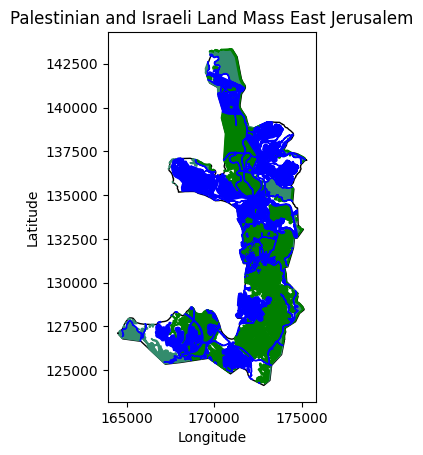

11.287141550787291
2.415579079951178
27.732565641402374


In [32]:
# East Jerusalem with seam zone in pie chart
# Clip to East Jerusalem
East_Jerusalem_palestinian_land_mass = gpd.clip(Palestinian_Land_Mass, East_Jerusalem) # Palestinian Land Mass in East Jerusalem
East_Jerusalem_seam_zone = gpd.clip(Seam_Zone, East_Jerusalem)
East_Jerusalem_israeli_land_mass = gpd.clip(Israeli_Land_Mass, East_Jerusalem)
#East_Jerusalem_israeli_land_mass.to_file('BoundariesFiles/East_Jerusalem_israeli_land_mass.geojson', driver = 'GeoJSON')
# Calculate Area for clipped layer
East_Jerusalem_palestinian_land_mass['Area_sqmi'] = Jerusalem_palestinian_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
East_Jerusalem_seam_zone['Area_sqmi'] = Jerusalem_seam_zone['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
East_Jerusalem_israeli_land_mass['Area_sqmi'] = East_Jerusalem_israeli_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
# Plot for Visualization (Includes East Jerusalem)
fig, ax = plt.subplots()
East_Jerusalem.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "East Jerusalem")
East_Jerusalem_seam_zone.plot(ax=ax, facecolor = "#338c6d", edgecolor = "#338c6d", label = "Palestinian Seam Zone in East Jerusalem")
East_Jerusalem_palestinian_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in East Jerusalem")
East_Jerusalem_israeli_land_mass.plot(ax = ax, facecolor = "blue", edgecolor = "blue", label = "Israeli Land Mass in East Jerusalem")
plt.title(f"Palestinian and Israeli Land Mass East Jerusalem")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



# Calculate the land mass in areas a, b, c etc.. Excludes East Jerusalem, and East Jerusalem land area
# Jerusalem_seam_zone['Area_sqmi'].groupby([Jerusalem_seam_zone['class']]).sum()
# Palestinian_Land_Mass_East_Jerusalem['Area_sqmi'].groupby(Palestinian_Land_Mass_East_Jerusalem['class']).sum()
# Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi'].groupby(Palestinian_Seam_Zone_East_Jerusalem['class']).sum()
Palestinian_Land_Mass_East_Jerusalem['Area_sqmi'] = Palestinian_Land_Mass_East_Jerusalem['geometry'].area * CONVERSION_FACTOR #sqmi
Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi'] = Palestinian_Seam_Zone_East_Jerusalem['geometry'].area * CONVERSION_FACTOR #sqmi
Israeli_Land_Mass_East_Jerusalem['Area_sqmi'] = Israeli_Land_Mass_East_Jerusalem['geometry'].area * CONVERSION_FACTOR #sqmi
Palestinian_Land_Mass_EJ_area = Palestinian_Land_Mass_East_Jerusalem['Area_sqmi'].sum()
print(Palestinian_Land_Mass_EJ_area)
Palestinian_Land_Mass_Seam_Zone_EJ_area = Palestinian_Seam_Zone_East_Jerusalem['Area_sqmi'].sum()
print(Palestinian_Land_Mass_Seam_Zone_EJ_area)
total_palestinian_developed_land_east_jerusalem = Palestinian_Land_Mass_EJ_area + Palestinian_Land_Mass_Seam_Zone_EJ_area
total_israeli_developed_land_east_jerusalem = Israeli_Land_Mass_East_Jerusalem['Area_sqmi'].sum()
undeveloped_area_c = east_jerusalem_area - total_palestinian_developed_land_east_jerusalem - total_israeli_developed_land_east_jerusalem
print(east_jerusalem_area)
# declaring data from land mass calculations
data = [Palestinian_Land_Mass_EJ_area, Palestinian_Land_Mass_Seam_Zone_EJ_area, total_israeli_developed_land_east_jerusalem, undeveloped_area_c]

# Custom color palette and labels
label_color_dict = {'Palestinian Developed Land' : 'rgb(85,135,47)', 'Palestinian Developed Land<br>in the Seam Zone' : 'rgb(51,140,109)' , 'Israeli Developed Land' : 'rgb(0,97,184)', 'Undeveloped Land' : '#42413F'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 2)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',       # background color around the plot  transparent
    plot_bgcolor='rgba(0,0,0,0)',        # background color of the plot transparent
    font_color='white',          # color of the legend and title
    title={
        'text': 'Area Distribution (Sqmi)', # removed East Jerusalem for Map visualization
        'x': 0.35,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 22},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text=f"{month} {year}<br>© Palestinian Land Demographics {year} <br>© OpenStreetMap",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=600
)

fig.write_html(f'{month}{year}\PieCharts_HTML\East_Jerusalem_With_Seam_Zone_Area_Distribution_Pie_Chart.html')
fig.write_image(f'{month}{year}\PieCharts_JPG\East_Jerusalem_With_Seam_Zone_Area_Distribution_Pie_Chart.png') #PNG
fig.show()

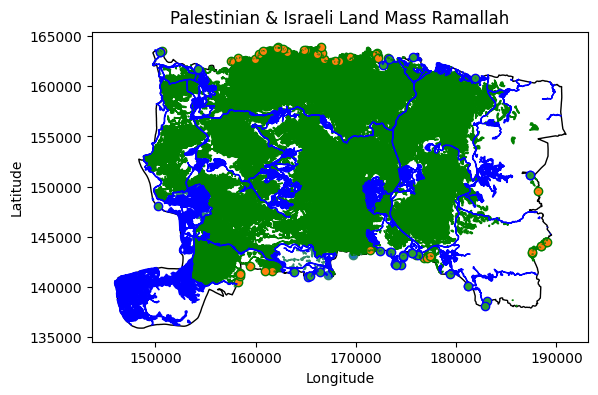

330.2360114702778


In [33]:
# Ramallah Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Ramallah_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Ramallah & Al Bireh']
# Clip to Governorate
Ramallah_palestinian_land_mass = gpd.clip(Palestinian_Land_Mass, Ramallah_gov)
Ramallah_seam_zone = gpd.clip(Seam_Zone, Ramallah_gov)
Ramallah_israeli_land_mass = gpd.clip(Israeli_Land_Mass, Ramallah_gov)
# Calculate Area for clipped layer
Ramallah_palestinian_land_mass['Area_sqmi'] = Ramallah_palestinian_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Ramallah_seam_zone['Area_sqmi'] = Ramallah_seam_zone['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Ramallah_israeli_land_mass['Area_sqmi'] = Ramallah_israeli_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
# Plot for Visualization
fig, ax = plt.subplots()
Ramallah_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Ramallah Governorate")
Ramallah_seam_zone.plot(ax=ax, facecolor = "#338c6d", edgecolor = "#338c6d", label = "Palestinian Seam Zone in Ramallah")
Ramallah_palestinian_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Ramallah")
Ramallah_israeli_land_mass.plot(ax = ax, facecolor = "blue", edgecolor = "blue", label = "Israeli Land Mass in Ramallah")
plt.title(f"Palestinian & Israeli Land Mass Ramallah")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc..
# Ramallah_seam_zone['Area_sqmi'].groupby([Ramallah_seam_zone['class']]).sum()
Ramallah_gov_area_a_area = Ramallah_palestinian_land_mass[Ramallah_palestinian_land_mass['class'] == 'A']['Area_sqmi'].sum()
Ramallah_gov_area_b_area = Ramallah_palestinian_land_mass[Ramallah_palestinian_land_mass['class'] == 'B']['Area_sqmi'].sum()
Ramallah_area_c_seam_zone = Ramallah_seam_zone[Ramallah_seam_zone['class'] == 'C']['Area_sqmi'].sum()
Ramallah_gov_area_c_area = Ramallah_palestinian_land_mass[Ramallah_palestinian_land_mass['class'] == 'C']['Area_sqmi'].sum() + Ramallah_area_c_seam_zone # for total Palestinian land in Area C
Ramallah_gov_israeli_area_c_area = Ramallah_israeli_land_mass[Ramallah_israeli_land_mass['class'] == 'C']['Area_sqmi'].sum()
Ramallah_gov_israeli_area_b_area = Ramallah_israeli_land_mass[Ramallah_israeli_land_mass['class'] == 'B']['Area_sqmi'].sum()
Ramallah_gov_area = Governorates[Governorates["Governorates_Name"] == "Ramallah & Al Bireh"]["Area_sqmi"].iloc[0]
print(Ramallah_gov_area)
undeveloped_area_c = Ramallah_gov_area - Ramallah_gov_area_a_area - Ramallah_gov_area_b_area - Ramallah_gov_area_c_area - Ramallah_gov_israeli_area_c_area - Ramallah_gov_israeli_area_b_area

# declaring data from land mass calculations
data = [Ramallah_gov_area_a_area, Ramallah_gov_area_b_area, Ramallah_gov_area_c_area, Ramallah_gov_israeli_area_c_area, Ramallah_gov_israeli_area_b_area, undeveloped_area_c]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#8e996f', 'Palestinian Area B' : '#a6d785', 'Palestinian Area C' : '#55872F', 'Israeli Area C' : '#0061b8', 'Israeli Area B' : '#79AA9D', 'Undeveloped Area C' : '#42413F'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 3)})' for label, value in zip(labels, data)]
  
# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Ramallah Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*The amount of land developed was calculated for Palestinian land in Area C as well as Israeli land in Area B and C <br> while the amount of land controlled was calculated for Palestinian land in Area A and B as per the interim agreements",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text=f"{month} {year}<br>© Palestinian Land Demographics {year}",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html(f'{month}{year}\PieCharts_HTML\Ramallah_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image(f'{month}{year}\PieCharts_JPG\Ramallah_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()



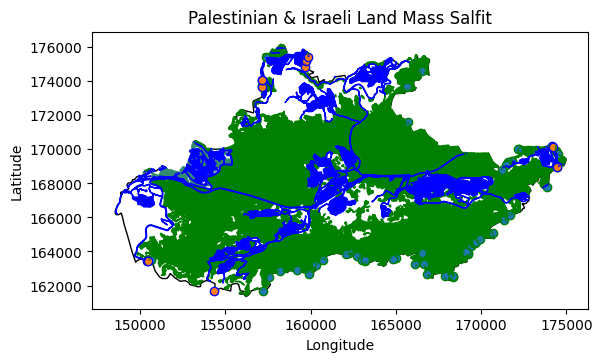

78.93246554658526


In [34]:
# Salfit Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Salfit_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Salfit']
# Clip to Governorate
Palestinian_Land_Mass['geometry'] = Palestinian_Land_Mass.geometry.apply(make_valid)
Salfit_palestinian_land_mass = gpd.clip(Palestinian_Land_Mass, Salfit_gov)
Salfit_seam_zone = gpd.clip(Seam_Zone, Salfit_gov)
Salfit_israeli_land_mass = gpd.clip(Israeli_Land_Mass, Salfit_gov)
# Calculate Area for clipped layer
Salfit_palestinian_land_mass['Area_sqmi'] = Salfit_palestinian_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Salfit_seam_zone['Area_sqmi'] = Salfit_seam_zone['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Salfit_israeli_land_mass['Area_sqmi'] = Salfit_israeli_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
# Plot for Visualization
fig, ax = plt.subplots()
Salfit_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Salfit Governorate")
Salfit_seam_zone.plot(ax=ax, facecolor = "#338c6d", edgecolor = "#338c6d", label = "Palestinian Seam Zone in Salfit")
Salfit_palestinian_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Salfit")
Salfit_israeli_land_mass.plot(ax = ax, facecolor = "blue", edgecolor = "blue", label = "Israeli Land Mass in Salfit")
plt.title(f"Palestinian & Israeli Land Mass Salfit")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc..
# Salfit_seam_zone['Area_sqmi'].groupby([Salfit_seam_zone['class']]).sum()
Salfit_gov_area_a_area = Salfit_palestinian_land_mass[Salfit_palestinian_land_mass['class'] == 'A']['Area_sqmi'].sum()
Salfit_gov_area_b_area = Salfit_palestinian_land_mass[Salfit_palestinian_land_mass['class'] == 'B']['Area_sqmi'].sum()
Salfit_area_c_seam_zone = Salfit_seam_zone[Salfit_seam_zone['class'] == 'C']['Area_sqmi'].sum()
Salfit_gov_area_c_area = Salfit_palestinian_land_mass[Salfit_palestinian_land_mass['class'] == 'C']['Area_sqmi'].sum() + Salfit_area_c_seam_zone # for total Palestinian land in Area C
Salfit_gov_israeli_area_c_area = Salfit_israeli_land_mass[Salfit_israeli_land_mass['class'] == 'C']['Area_sqmi'].sum()
Salfit_gov_area = Governorates[Governorates["Governorates_Name"] == "Salfit"]["Area_sqmi"].iloc[0]
print(Salfit_gov_area)
undeveloped_area_c = Salfit_gov_area - Salfit_gov_area_a_area - Salfit_gov_area_b_area - Salfit_gov_area_c_area - Salfit_gov_israeli_area_c_area

# declaring data from land mass calculations
data = [Salfit_gov_area_a_area, Salfit_gov_area_b_area, Salfit_gov_area_c_area, Salfit_gov_israeli_area_c_area, undeveloped_area_c]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#8e996f', 'Palestinian Area B' : '#a6d785', 'Palestinian Area C' : '#55872F', 'Israeli Area C' : '#0061b8', 'Undeveloped Area C' : '#42413F'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 3)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Salfit Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*The amount of land developed was calculated for Palestinian land in Area C as well as Israeli land in Area C <br> while the amount of land controlled was calculated for Palestinian land in Area A and B as per the interim agreements",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text=f"{month} {year}<br>© Palestinian Land Demographics {year}",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html(f'{month}{year}\PieCharts_HTML\Salfit_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image(f'{month}{year}\PieCharts_JPG\Salfit_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()



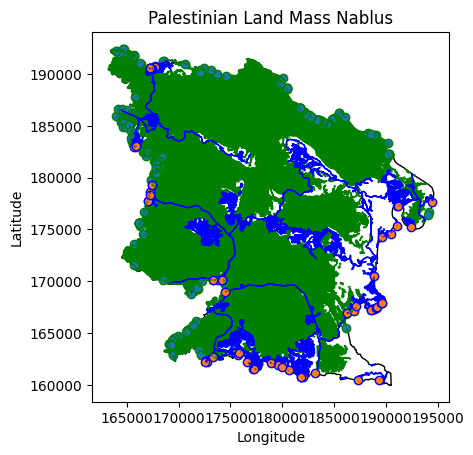

231.07841083713257


In [35]:
# Nablus Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Nablus_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Nablus']
# Clip to Governorate
Nablus_palestinian_land_mass = gpd.clip(Palestinian_Land_Mass, Nablus_gov)
Nablus_israeli_land_mass = gpd.clip(Israeli_Land_Mass, Nablus_gov)
# Calculate Area for clipped layer
Nablus_palestinian_land_mass['Area_sqmi'] = Nablus_palestinian_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Nablus_israeli_land_mass['Area_sqmi'] = Nablus_israeli_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
# Plot for Visualization
fig, ax = plt.subplots()
Nablus_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Nablus Governorate")
Nablus_palestinian_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Nablus")
Nablus_israeli_land_mass.plot(ax = ax, facecolor = "blue", edgecolor = "blue", label = "Israeli Land Mass in Nablus")
plt.title(f"Palestinian Land Mass Nablus")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc..
# Nablus has no seam zone
Nablus_gov_area_a_area = Nablus_palestinian_land_mass[Nablus_palestinian_land_mass['class'] == 'A']['Area_sqmi'].sum()
Nablus_gov_area_b_area = Nablus_palestinian_land_mass[Nablus_palestinian_land_mass['class'] == 'B']['Area_sqmi'].sum()
Nablus_gov_area_c_area = Nablus_palestinian_land_mass[Nablus_palestinian_land_mass['class'] == 'C']['Area_sqmi'].sum() # for total Palestinian land in Area C
Nablus_gov_israeli_area_c_area = Nablus_israeli_land_mass[Nablus_israeli_land_mass['class'] == 'C']['Area_sqmi'].sum()
Nablus_gov_israeli_area_b_area = Nablus_israeli_land_mass[Nablus_israeli_land_mass['class'] == 'B']['Area_sqmi'].sum()
Nablus_gov_area = Governorates[Governorates["Governorates_Name"] == "Nablus"]["Area_sqmi"].iloc[0]
print(Nablus_gov_area)
open_or_israeli_area = Nablus_gov_area - Nablus_gov_area_a_area - Nablus_gov_area_b_area - Nablus_gov_area_c_area - Nablus_gov_israeli_area_c_area - Nablus_gov_israeli_area_b_area

# declaring data from land mass calculations
data = [Nablus_gov_area_a_area, Nablus_gov_area_b_area, Nablus_gov_area_c_area, Nablus_gov_israeli_area_c_area, Nablus_gov_israeli_area_b_area, undeveloped_area_c]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#8e996f', 'Palestinian Area B' : '#a6d785', 'Palestinian Area C' : '#55872F', 'Israeli Area C' : '#0061b8', 'Israeli Area B' : '#79AA9D', 'Undeveloped Area C' : '#42413F'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 3)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Nablus Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*The amount of land developed was calculated for Palestinian land in Area C as well as Israeli land in Area B and C <br> while the amount of land controlled was calculated for Palestinian land in Area A and B as per the interim agreements",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text=f"{month} {year}<br>© Palestinian Land Demographics {year}",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html(f'{month}{year}/PieCharts_HTML/Nablus_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image(f'{month}{year}/PieCharts_JPG/Nablus_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()


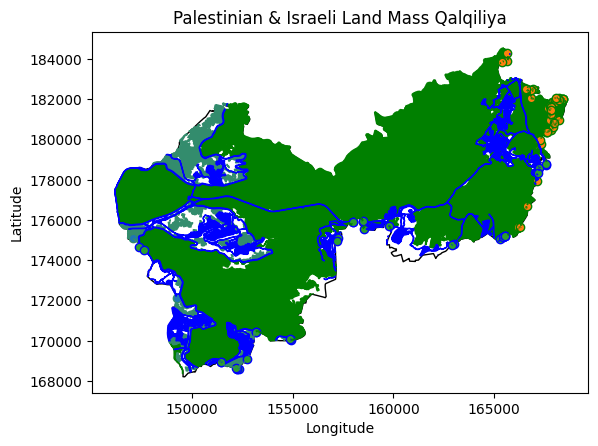

63.83822497040119


In [36]:
# Qalqiliya Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Qalqiliya_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Qalqiliya']
# Clip to Governorate
Qalqiliya_palestinian_land_mass = gpd.clip(Palestinian_Land_Mass, Qalqiliya_gov)
Qalqiliya_seam_zone = gpd.clip(Seam_Zone, Qalqiliya_gov)
Qalqiliya_israeli_land_mass = gpd.clip(Israeli_Land_Mass, Qalqiliya_gov)
# Calculate Area for clipped layer
Qalqiliya_palestinian_land_mass['Area_sqmi'] = Qalqiliya_palestinian_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Qalqiliya_seam_zone['Area_sqmi'] = Qalqiliya_seam_zone['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Qalqiliya_israeli_land_mass['Area_sqmi'] = Qalqiliya_israeli_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
# Plot for Visualization
fig, ax = plt.subplots()
Qalqiliya_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Qalqiliya Governorate")
Qalqiliya_seam_zone.plot(ax=ax, facecolor = "#338c6d", edgecolor = "#338c6d", label = "Palestinian Seam Zone in Qalqiliya")
Qalqiliya_palestinian_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Qalqiliya")
Qalqiliya_israeli_land_mass.plot(ax = ax, facecolor = "blue", edgecolor = "blue", label = "Israeli Land Mass in Qalqiliya")
plt.title(f"Palestinian & Israeli Land Mass Qalqiliya")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc..
# Qalqiliya_seam_zone['Area_sqmi'].groupby([Qalqiliya_seam_zone['class']]).sum()
Qalqiliya_gov_area_a_area = Qalqiliya_palestinian_land_mass[Qalqiliya_palestinian_land_mass['class'] == 'A']['Area_sqmi'].sum()
Qalqiliya_area_b_seam_zone = Qalqiliya_seam_zone[Qalqiliya_seam_zone['class'] == 'B']['Area_sqmi'].sum()
Qalqiliya_gov_area_b_area = Qalqiliya_palestinian_land_mass[Qalqiliya_palestinian_land_mass['class'] == 'B']['Area_sqmi'].sum() + Qalqiliya_area_b_seam_zone
Qalqiliya_area_c_seam_zone = Qalqiliya_seam_zone[Qalqiliya_seam_zone['class'] == 'C']['Area_sqmi'].sum()
Qalqiliya_gov_area_c_area = Qalqiliya_palestinian_land_mass[Qalqiliya_palestinian_land_mass['class'] == 'C']['Area_sqmi'].sum() + Qalqiliya_area_c_seam_zone # for total Palestinian land in Area C
Qalqiliya_gov_israeli_area_c_area = Qalqiliya_israeli_land_mass[Qalqiliya_israeli_land_mass['class'] == 'C']['Area_sqmi'].sum()
Qalqiliya_gov_israeli_area_b_area = Qalqiliya_israeli_land_mass[Qalqiliya_israeli_land_mass['class'] == 'B']['Area_sqmi'].sum()
Qalqiliya_gov_area = Governorates[Governorates["Governorates_Name"] == "Qalqiliya"]["Area_sqmi"].iloc[0]
print(Qalqiliya_gov_area)
undeveloped_area_c = Qalqiliya_gov_area - Qalqiliya_gov_area_a_area - Qalqiliya_gov_area_b_area - Qalqiliya_gov_area_c_area - Qalqiliya_gov_israeli_area_c_area - Qalqiliya_gov_israeli_area_b_area

# declaring data from land mass calculations
data = [Qalqiliya_gov_area_a_area, Qalqiliya_gov_area_b_area, Qalqiliya_gov_area_c_area, Qalqiliya_gov_israeli_area_c_area, Qalqiliya_gov_israeli_area_b_area, undeveloped_area_c]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#8e996f', 'Palestinian Area B' : '#a6d785', 'Palestinian Area C' : '#55872F', 'Israeli Area C' : '#0061b8', 'Israeli Area B' : '#79AA9D', 'Undeveloped Area C' : '#42413F'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 3)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Qalqiliya Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*The amount of land developed was calculated for Palestinian land in Area C as well as Israeli land in Area B and C <br> while the amount of land controlled was calculated for Palestinian land in Area A and B as per the interim agreements",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text=f"{month} {year}<br>© Palestinian Land Demographics {year}",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html(f'{month}{year}\PieCharts_HTML\Qalqiliya_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image(f'{month}{year}\PieCharts_JPG\Qalqiliya_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()


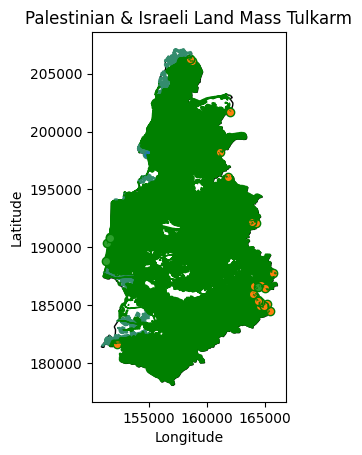

95.1707067791299


In [37]:
# Tulkarm Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Tulkarm_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Tulkarm']
# Clip to Governorate
Tulkarm_palestinian_land_mass = gpd.clip(Palestinian_Land_Mass, Tulkarm_gov)
Tulkarm_seam_zone = gpd.clip(Seam_Zone, Tulkarm_gov)
Tulkarm_israeli_land_mass = gpd.clip(Israeli_Land_Mass, Tulkarm_gov)
# Calculate Area for clipped layer
Tulkarm_palestinian_land_mass['Area_sqmi'] = Tulkarm_palestinian_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Tulkarm_seam_zone['Area_sqmi'] = Tulkarm_seam_zone['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Tulkarm_israeli_land_mass['Area_sqmi'] = Tulkarm_israeli_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
# Plot for Visualization
fig, ax = plt.subplots()
Tulkarm_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Tulkarm Governorate")
Tulkarm_seam_zone.plot(ax=ax, facecolor = "#338c6d", edgecolor = "#338c6d", label = "Palestinian Seam Zone in Tulkarm")
Tulkarm_palestinian_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Tulkarm")
Tulkarm_israeli_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Israeli Land Mass in Tulkarm")
plt.title(f"Palestinian & Israeli Land Mass Tulkarm")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc..
# Tulkarm_seam_zone['Area_sqmi'].groupby([Tulkarm_seam_zone['class']]).sum()
Tulkarm_gov_area_a_area = Tulkarm_palestinian_land_mass[Tulkarm_palestinian_land_mass['class'] == 'A']['Area_sqmi'].sum()
Tulkarm_gov_area_b_area = Tulkarm_palestinian_land_mass[Tulkarm_palestinian_land_mass['class'] == 'B']['Area_sqmi'].sum()
Tulkarm_area_c_seam_zone = Tulkarm_seam_zone[Tulkarm_seam_zone['class'] == 'C']['Area_sqmi'].sum()
Tulkarm_gov_area_c_area = Tulkarm_palestinian_land_mass[Tulkarm_palestinian_land_mass['class'] == 'C']['Area_sqmi'].sum() + Tulkarm_area_c_seam_zone # for total Palestinian land in Area C
Tulkarm_gov_israeli_area_c_area = Tulkarm_israeli_land_mass[Tulkarm_israeli_land_mass['class'] == 'C']['Area_sqmi'].sum()
Tulkarm_gov_israeli_area_a_area = Tulkarm_israeli_land_mass[Tulkarm_israeli_land_mass['class'] == 'A']['Area_sqmi'].sum()
Tulkarm_gov_israeli_area_b_area = Tulkarm_israeli_land_mass[Tulkarm_israeli_land_mass['class'] == 'B']['Area_sqmi'].sum()
Tulkarm_gov_area = Governorates[Governorates["Governorates_Name"] == "Tulkarm"]["Area_sqmi"].iloc[0]
print(Tulkarm_gov_area)
undeveloped_area_c = Tulkarm_gov_area - Tulkarm_gov_area_a_area - Tulkarm_gov_area_b_area - Tulkarm_gov_area_c_area - Tulkarm_gov_israeli_area_c_area - Tulkarm_gov_israeli_area_a_area - Tulkarm_gov_israeli_area_b_area

# declaring data from land mass calculations
data = [Tulkarm_gov_area_a_area, Tulkarm_gov_area_b_area, Tulkarm_gov_area_c_area, Tulkarm_gov_israeli_area_c_area, Tulkarm_gov_israeli_area_a_area, Tulkarm_gov_israeli_area_b_area, undeveloped_area_c]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#8e996f', 'Palestinian Area B' : '#a6d785', 'Palestinian Area C' : '#55872F', 'Israeli Area C' : '#0061b8', 'Israeli Area A' : '#7A9DA2', 'Israeli Area B' : '#79AA9D', 'Undeveloped Area C' : '#42413F'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 3)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Tulkarm Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*The amount of land developed was calculated for Palestinian land in Area C as well as Israeli land in Area A, B, and C <br> while the amount of land controlled was calculated for Palestinian land in Area A and B as per the interim agreements",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text=f"{month} {year}<br>© Palestinian Land Demographics {year}",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html(f'{month}{year}\PieCharts_HTML\Tulkarm_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image(f'{month}{year}\PieCharts_JPG\Tulkarm_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()

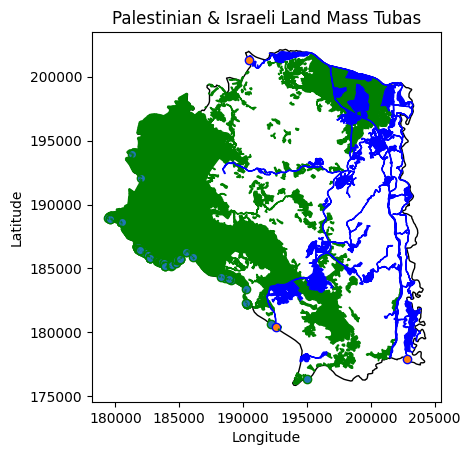

157.8183492280824


In [38]:
# Tubas Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Tubas_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Tubas']
# Clip to Governorate
Tubas_palestinian_land_mass = gpd.clip(Palestinian_Land_Mass, Tubas_gov)
Tubas_israeli_land_mass = gpd.clip(Israeli_Land_Mass, Tubas_gov)
# Calculate Area for clipped layer
Tubas_palestinian_land_mass['Area_sqmi'] = Tubas_palestinian_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Tubas_israeli_land_mass['Area_sqmi'] = Tubas_israeli_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
# Plot for Visualization
fig, ax = plt.subplots()
Tubas_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Tubas Governorate")
Tubas_palestinian_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Tubas")
Tubas_israeli_land_mass.plot(ax = ax, facecolor = "blue", edgecolor = "blue", label = "Israeli Land Mass in Tubas")
plt.title(f"Palestinian & Israeli Land Mass Tubas")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc..
# No Seam Zone
Tubas_gov_area_a_area = Tubas_palestinian_land_mass[Tubas_palestinian_land_mass['class'] == 'A']['Area_sqmi'].sum()
Tubas_gov_area_b_area = Tubas_palestinian_land_mass[Tubas_palestinian_land_mass['class'] == 'B']['Area_sqmi'].sum()
Tubas_gov_area_c_area = Tubas_palestinian_land_mass[Tubas_palestinian_land_mass['class'] == 'C']['Area_sqmi'].sum()  # for total Palestinian land in Area C
Tubas_gov_israeli_area_c_area = Tubas_israeli_land_mass[Tubas_israeli_land_mass['class'] == 'C']['Area_sqmi'].sum()
Tubas_gov_area = Governorates[Governorates["Governorates_Name"] == "Tubas"]["Area_sqmi"].iloc[0]
print(Tubas_gov_area)
undeveloped_area_c = Tubas_gov_area - Tubas_gov_area_a_area - Tubas_gov_area_b_area - Tubas_gov_area_c_area - Tubas_gov_israeli_area_c_area

# declaring data from land mass calculations
data = [Tubas_gov_area_a_area, Tubas_gov_area_b_area, Tubas_gov_area_c_area, Tubas_gov_israeli_area_c_area, undeveloped_area_c]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#8e996f', 'Palestinian Area B' : '#a6d785', 'Palestinian Area C' : '#55872F', 'Israeli Area C' : '#0061b8', 'Undeveloped Area C' : '#42413F'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 3)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Tubas Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*The amount of land developed was calculated for Palestinian land in Area C as well as Israeli land in Area C <br> while the amount of land controlled was calculated for Palestinian land in Area A and B as per the interim agreements",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text=f"{month} {year}<br>© Palestinian Land Demographics {year}",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html(f'{month}{year}\PieCharts_HTML\Tubas_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image(f'{month}{year}\PieCharts_JPG\Tubas_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()

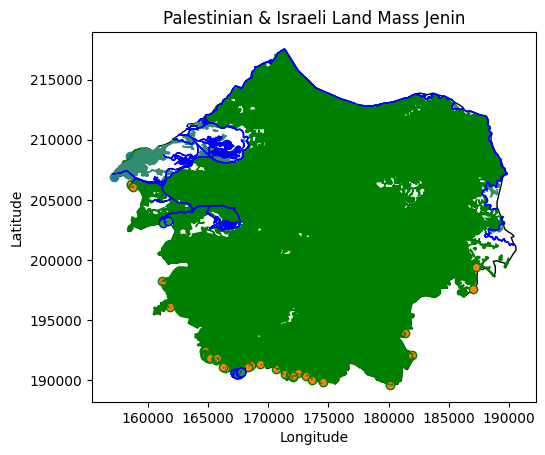

225.36564606965112


In [39]:
# Jenin Governorate
West_Bank_Governorates = Governorates[Governorates['Governorates_Code'] < 2000]
Jenin_gov = West_Bank_Governorates[West_Bank_Governorates['Governorates_Name'] == 'Jenin']
# Clip to Governorate
Jenin_palestinian_land_mass = gpd.clip(Palestinian_Land_Mass, Jenin_gov)
Jenin_seam_zone = gpd.clip(Seam_Zone, Jenin_gov)
Jenin_israeli_land_mass = gpd.clip(Israeli_Land_Mass, Jenin_gov)
# Calculate Area for clipped layer
Jenin_palestinian_land_mass['Area_sqmi'] = Jenin_palestinian_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Jenin_seam_zone['Area_sqmi'] = Jenin_seam_zone['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
Jenin_israeli_land_mass['Area_sqmi'] = Jenin_israeli_land_mass['geometry'].to_crs(epsg=28191).area * CONVERSION_FACTOR
# Plot for Visualization
fig, ax = plt.subplots()
Jenin_gov.plot(ax = ax, facecolor = "white", edgecolor = "black", label = "Jenin Governorate")
Jenin_seam_zone.plot(ax=ax, facecolor = "#338c6d", edgecolor = "#338c6d", label = "Palestinian Seam Zone in Jenin")
Jenin_palestinian_land_mass.plot(ax = ax, facecolor = "green", edgecolor = "green", label = "Palestinian Land Mass in Jenin")
Jenin_israeli_land_mass.plot(ax = ax, facecolor = "blue", edgecolor = "blue", label = "Israeli Land Mass in Jenin")
plt.title(f"Palestinian & Israeli Land Mass Jenin")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Calculate the land mass in areas a, b, c etc..
# Jenin_seam_zone['Area_sqmi'].groupby([Jenin_seam_zone['class']]).sum()  
Jenin_gov_area_a_area = Jenin_palestinian_land_mass[Jenin_palestinian_land_mass['class'] == 'A']['Area_sqmi'].sum()
Jenin_area_b_seam_zone = Jenin_seam_zone[Jenin_seam_zone['class'] == 'B']['Area_sqmi'].sum()
Jenin_gov_area_b_area = Jenin_palestinian_land_mass[Jenin_palestinian_land_mass['class'] == 'B']['Area_sqmi'].sum() + Jenin_area_b_seam_zone
Jenin_area_c_seam_zone = Jenin_seam_zone[Jenin_seam_zone['class'] == 'C']['Area_sqmi'].sum()
Jenin_gov_area_c_area = Jenin_palestinian_land_mass[Jenin_palestinian_land_mass['class'] == 'C']['Area_sqmi'].sum() + Jenin_area_c_seam_zone  # for total Palestinian land in Area C
Jenin_gov_israeli_area_c_area = Jenin_israeli_land_mass[Jenin_israeli_land_mass['class'] == 'C']['Area_sqmi'].sum()
Jenin_gov_israeli_area_b_area = Jenin_israeli_land_mass[Jenin_israeli_land_mass['class'] == 'B']['Area_sqmi'].sum()
Jenin_gov_area = Governorates[Governorates["Governorates_Name"] == "Jenin"]["Area_sqmi"].iloc[0]
print(Jenin_gov_area)
undeveloped_area_c = Jenin_gov_area - Jenin_gov_area_a_area - Jenin_gov_area_b_area - Jenin_gov_area_c_area - Jenin_gov_israeli_area_c_area - Jenin_gov_israeli_area_b_area

# declaring data from land mass calculations
data = [Jenin_gov_area_a_area, Jenin_gov_area_b_area, Jenin_gov_area_c_area, Jenin_gov_israeli_area_c_area, Jenin_gov_israeli_area_b_area, undeveloped_area_c]

# Custom color palette and labels
label_color_dict = {'Palestinian Area A' : '#8e996f', 'Palestinian Area B' : '#a6d785', 'Palestinian Area C' : '#55872F', 'Israeli Area C' : '#0061b8', 'Israeli Area B' : '#79AA9D', 'Undeveloped Area C' : '#42413F'}
labels = list(label_color_dict.keys())
palette_color = list(label_color_dict.values())
custom_labels = [f'{label} ({round(value, 3)})' for label, value in zip(labels, data)]

# Pie chart using plotly
fig = go.Figure(
    data=[
        go.Pie(
            labels=custom_labels,
            values=data,
            marker=dict(colors=palette_color)
            
        )
    ]
)

fig.update_traces(textposition='inside',       # puts text inside the pie chart
                    textinfo = 'percent',        # shows us the percent and the area in sqmi ('percent+label' to show both)
                    textfont_color='white')      # color of the labels inside the pie chart are set to white

fig.update_layout(
    paper_bgcolor='black',       # background color around the plot  
    plot_bgcolor='black',        # background color of the plot
    font_color='white',          # color of the legend and title
    title={
        'text': 'Jenin Governorate Area Distribution (Sqmi)',
        'x': 0.5,                # Middle
        'y': 0.90,                # Nearly at the top
        'xanchor': 'center',
        'yanchor': 'middle',
        'font': {'size': 34}     # Increase font size for the title
    },
    legend={
        'font': {'size': 18},     # Increase font size for the legend
        'x': 1,                   # Position legend to the right of the pie chart
        'y': 0.5,                 # Position legend in the middle
        'xanchor': 'left',
        'yanchor': 'middle'
    },
    annotations=[
        dict(
            text="*The amount of land developed was calculated for Palestinian land in Area C as well as Israeli land in Area B and C <br> while the amount of land controlled was calculated for Palestinian land in Area A and B as per the interim agreements",
            x=0.7,
            y=0.05,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='center'
        ),
        dict(
            text=f"{month} {year}<br>© Palestinian Land Demographics {year}",
            x=1.05,
            y=0.25,
            showarrow=False,
            font=dict(color='white', size=12),
            xanchor='left',
            yanchor='top'
        )
    ],
    width=1000,                  # width and height of the pie chart
    height=1000
)

fig.write_html(f'{month}{year}\PieCharts_HTML\Jenin_Governorate_Area_Distribution_Pie_Chart.html')
fig.write_image(f'{month}{year}\PieCharts_JPG\Jenin_Governorate_Area_Distribution_Pie_Chart.jpg')
fig.show()